# Exploring the Intersection of Global Suicide Incidence and Socioeconomic Influences Over Three Decades (1990 - 2022

## Installing Importatnt Libraries

In [1]:
!pip install geopandas --quiet
# This will install geopandas without displaying any output unless there's an error during the installation process.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style('whitegrid')

In [5]:
# Loading The Dataset
df = pd.read_csv(r"E:\Projects\Sucide rates\suicide_rates_1990-2022.csv")

In [6]:
# Checking Shape of the Dataframe
df.shape

(118560, 18)

In [7]:
# Displaying the First 10 Rows
df.head(10)

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
5,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,1.904762,3.276003,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
6,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,1.357466,2.487562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
7,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,2.094241,3.202562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
8,EU,Europe,ALB,Albania,1992,Male,35-54 years,Generation X,1.0,0.555556,0.915751,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
9,EU,Europe,ALB,Albania,1992,Male,35-54 years,Generation X,3.0,1.428571,3.428571,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [8]:
# Reviewing last 10 rows
df.tail()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
118555,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118559,NAC,North America and the Caribbean,USA,United States of America,2021,Female,Unknown,Unknown,0.0,0.000000,NaN,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [9]:
# Checking info 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

### Display columns except for numerical ones.

In [11]:
non_numeric = df.select_dtypes(exclude=np.number).columns

In [12]:
non_numeric

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Sex',
       'AgeGroup', 'Generation'],
      dtype='object')

### Display columns including for numerical ones.

In [13]:
only_numeric = df.select_dtypes(include=np.number).columns

In [14]:
only_numeric

Index(['Year', 'SuicideCount', 'CauseSpecificDeathPercentage',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

### View the dataset statistics

In [15]:
df.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560.000000,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,2005.740047,63.632037,3.873690,12.299791,2.456184e+07,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,8.745003,254.095408,7.317820,21.016170,4.531156e+07,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,32.000000,4.355646,15.384615,2.533364e+07,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [16]:
df.describe().T
# It tranposes rows with columns for better understanding

,count,mean,std,min,25%,50%,75%,max
Year,118560.0,2.005740e+03,8.745003e+00,1.990000e+03,1.999000e+03,2.006000e+03,2.013000e+03,2.022000e+03
SuicideCount,118096.0,6.363204e+01,2.540954e+02,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,6.787000e+03
CauseSpecificDeathPercentage,114271.0,3.873690e+00,7.317820e+00,0.000000e+00,0.000000e+00,5.861665e-01,4.355646e+00,1.000000e+02
DeathRatePer100K,107896.0,1.229979e+01,2.101617e+01,0.000000e+00,0.000000e+00,4.452366e+00,1.538462e+01,5.025126e+02
Population,112640.0,2.456184e+07,4.531156e+07,4.054200e+04,2.613805e+06,6.888434e+06,2.533364e+07,3.320316e+08
GDP,111320.0,4.883351e+11,1.653252e+12,2.197630e+08,1.162585e+10,6.268216e+10,3.013550e+11,2.331510e+13
GDPPerCapita,111320.0,1.742351e+04,1.933214e+04,6.023512e+01,3.941599e+03,9.708141e+03,2.519727e+04,1.337118e+05
GrossNationalIncome,108600.0,4.976795e+11,1.689591e+12,2.082832e+08,1.176795e+10,5.987715e+10,3.057210e+11,2.370530e+13
GNIPerCapita,107800.0,2.214722e+04,1.888640e+04,7.800000e+02,8.670000e+03,1.615000e+04,2.953000e+04,1.526300e+05
InflationRate,104100.0,2.028646e+01,1.630999e+02,-1.063010e+01,1.498961e+00,3.038888e+00,6.536199e+00,4.734914e+03


In [17]:
df.describe(exclude=np.number).T

,count,unique,top,freq
RegionCode,118560,6,EU,45140
RegionName,118560,6,Europe,45140
CountryCode,118560,117,ARG,1740
CountryName,118560,117,Argentina,1740
Sex,118560,3,Male,58320
AgeGroup,118560,7,0-14 years,23712
Generation,118560,7,Generation Alpha,23712


## Data Cleaning

In [18]:
# Calculate the percentage of missing values in each column
missing_threshold = 20
missing_percentages = df.isna().sum() * 100 / len(df)
missing_percentages = round(missing_percentages, 2)

In [19]:
missing_percentages

RegionCode                       0.00
RegionName                       0.00
CountryCode                      0.00
CountryName                      0.00
Year                             0.00
Sex                              0.00
AgeGroup                         0.00
Generation                       0.00
SuicideCount                     0.39
CauseSpecificDeathPercentage     3.62
DeathRatePer100K                 8.99
Population                       4.99
GDP                              6.11
GDPPerCapita                     6.11
GrossNationalIncome              8.40
GNIPerCapita                     9.08
InflationRate                   12.20
EmploymentPopulationRatio        9.38
dtype: float64

In [20]:
# Sort missing percentages in descending order
missing_sorted_perct = missing_percentages.sort_values(ascending=True)

In [21]:
missing_sorted_perct

RegionCode                       0.00
RegionName                       0.00
CountryCode                      0.00
CountryName                      0.00
Year                             0.00
Sex                              0.00
AgeGroup                         0.00
Generation                       0.00
SuicideCount                     0.39
CauseSpecificDeathPercentage     3.62
Population                       4.99
GDP                              6.11
GDPPerCapita                     6.11
GrossNationalIncome              8.40
DeathRatePer100K                 8.99
GNIPerCapita                     9.08
EmploymentPopulationRatio        9.38
InflationRate                   12.20
dtype: float64

In [22]:
df.shape

(118560, 18)

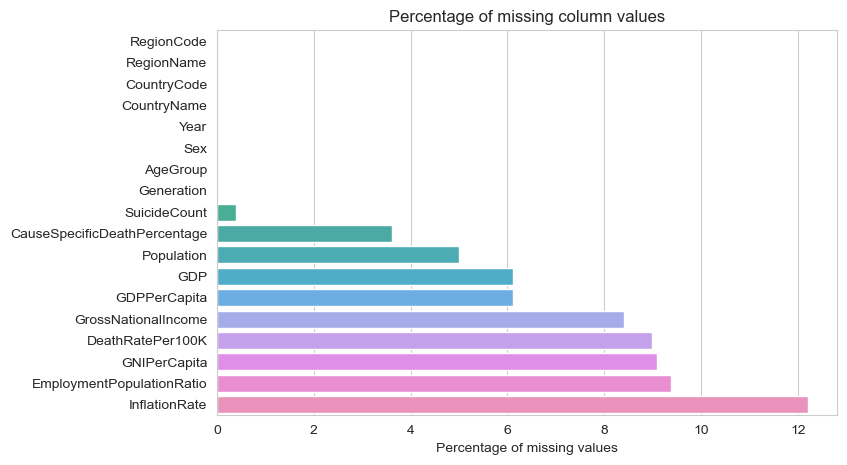

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_sorted_perct.values, y=missing_sorted_perct.index)
plt.title("Percentage of missing column values")
plt.xlabel("Percentage of missing values")
plt.show()

In [24]:
# Skipping columns with missing value percentage exceeding the threshold
for column, missing_percentage in missing_sorted_perct.items():
    if missing_percentage > missing_threshold:
        df.drop(columns=column, inplace=True)

In [25]:
df.shape

(118560, 18)

# Data Visualization

# Global Suicide Data and Economic Factors KPIs

## Key Performance Indicators (KPIs) concerning global suicide data and economic factors involve calculating several statistics from the dataset.
## These include

1. **Total Number of Suicides (in millions):** 
   
   This indicates the cumulative number of suicides across all available years.

2. **Average Number of Suicides per 100,000 People:**

   This metric provides a standardized measure of suicide rates across different populations.

3. **Average Gross Domestic Product (GDP) (in billions of dollars):**

   This represents the mean GDP over the years for which data is available.

4. **GDP per Capita:**

   GDP per capita is calculated by dividing the total GDP by the population of the respective year.

5. **Year with the Highest Suicide Rate (excluding 2022):**

   This identifies the year with the highest suicide rate among the available years, excluding the year 2022.

6. **Year with the Lowest Suicide Rate (excluding 2022):**

   This identifies the year with the lowest suicide rate among the available years, excluding the year 2022.

7. **Generation with the Highest Suicide Rates:**

   This indicates which generation experienced the highest suicide rates based on available data.

## Calculating and Presenting the KPIs

Below, we will calculate and present these KPIs using available datasets and statistical analysis tools.



In [26]:
df.groupby("RegionName")["SuicideCount"].sum().sort_values(ascending =False)

RegionName
Europe                             3624527.0
Asia                               1665543.0
North America and the Caribbean    1363995.0
Central and South America           748702.0
Oceania                              96330.0
Africa                               15592.0
Name: SuicideCount, dtype: float64

In [27]:
total_suicides = df['SuicideCount'].sum() / 1e6 # Millions

In [28]:
total_suicides

7.514689

In [29]:
total_suicides_100k = df["DeathRatePer100K"].mean()

In [30]:
total_suicides_100k

12.299791313798286

In [31]:
# Calculate average GDP and GDP per Capita
average_gdp = df['GDP'].mean()
average_gdp_billion = average_gdp / 1e9  # Convert to billions of dollars
average_gdp_per_capita = df['GDPPerCapita'].mean()

In [32]:
average_gdp_billion

488.33512767453135

In [33]:
average_gdp_per_capita

17423.508254449636

In [34]:
yearly_suicide_counts = df.groupby('Year')['SuicideCount'].sum()

# Find the year with the highest suicide count
year_with_highest_suicide_count = yearly_suicide_counts.idxmax()
highest_suicide_count = yearly_suicide_counts.max()

In [35]:
year_with_lowest_suicide_count = yearly_suicide_counts.idxmin()
lowest_suicide_count = yearly_suicide_counts.min()

print("Year with the highest suicide count:", year_with_highest_suicide_count)
print("Highest suicide count:", highest_suicide_count)

print("Year with the lowest suicide count:", year_with_lowest_suicide_count)
print("Lowest suicide count:", lowest_suicide_count)

Year with the highest suicide count: 2002
Highest suicide count: 260762.0
Year with the lowest suicide count: 2022
Lowest suicide count: 13955.0


In [36]:
highest_death_year = df[df["Year"] !=2022].groupby("Year")["DeathRatePer100K"].sum().idxmax()

In [37]:
highest_death_year

2001

In [38]:
highest_death_count = df[df["Year"] !=2022].groupby("Year")["DeathRatePer100K"].sum().max()
highest_death_count = round(highest_death_count)

In [39]:
highest_death_count

49428

In [40]:
lowest_death_year = df[df["Year"]!=2022].groupby("Year")["DeathRatePer100K"].sum().idxmin()

In [41]:
lowest_death_count = df[df["Year"]!=2022].groupby("Year")["DeathRatePer100K"].sum().min()

In [42]:
# Calculate the generation with the highest suicide rates
gent_with_highest_suicide = df.groupby('Generation')['DeathRatePer100K'].sum().idxmax()

In [43]:
gent_with_highest_suicide

'Silent Generation'

In [44]:
lowest_generation = df.groupby("Generation")["DeathRatePer100K"].sum().idxmin()

In [45]:
lowest_generation

'Unknown'

In [46]:
from IPython.display import HTML
css_styles = """
<style>
.icon {  
  float: right;
  font-size: 500%;
  position: absolute;
  top: 0rem;
  right: -0.3rem;
  opacity: 0.16;
}

#container {
  width: 100%;
  max-width: 1200px;
  display: flex;
  flex-wrap: wrap;
}

.kpi-card {
  overflow: hidden;
  position: relative;
  box-shadow: 1px 1px 3px rgba(0, 0, 0, 0.75);
  display: inline-block;
  padding: 1em;
  border-radius: 0.3em;
  font-family: sans-serif;
  width: calc(25% - 1em);
  min-width: 180px;
  margin: 0.5em;
}

.card-value {
  display: block;
  font-size: 200%;
  font-weight: bold;
}

.card-text {
  display: block;
  font-size: 70%;
  padding-left: 0.2em;
}

.orange {
  background: #ffc241;
  color: #fff;
}

.purple {
  background: #886ab5;
  color: #fff;
}

.grey-dark {
  background: #495057;
  color: #efefef;
}

.red {
  background: #a83b3b;
  color: #fff;
}
</style>
"""

html_code = f"""
<div id="container">
  <div class="kpi-card orange">
    <span class="card-value">{total_suicides:,.2f}M </span>
    <span class="card-text">Total Suicides</span>
    <i class="fas fa-skull-crossbones icon"></i>
  </div>

  <div class="kpi-card purple">
    <span class="card-value">{total_suicides_100k:,.0f} </span>
    <span class="card-text">Average Suicides per 100k</span>
    <i class="fas fa-user-alt-slash icon"></i>
  </div>

  <div class="kpi-card grey-dark">
    <span class="card-value">${average_gdp_billion:.2f}B </span>
    <span class="card-text">Average GDP</span>
    <i class="fas fa-chart-line icon"></i>
  </div>

  <div class="kpi-card red">
    <span class="card-value">{average_gdp_per_capita:,.0f} </span>
    <span class="card-text">GDP per Capita</span>
    <i class="fas fa-money-bill-alt icon"></i>
  </div>

  <div class="kpi-card orange">
    <span class="card-value">{highest_death_year} </span>
    <span class="card-text">Year with Highest Suicide Rates</span>
    <i class="fas fa-calendar-alt icon"></i>
  </div>

  <div class="kpi-card purple">
    <span class="card-value">{lowest_death_year} </span>
    <span class="card-text">Year with Lowest Suicide Rates</span>
    <i class="fas fa-calendar-alt icon"></i>
  </div>

  <div class="kpi-card grey-dark">
    <span class="card-value">{gent_with_highest_suicide} </span>
    <span class="card-text">Generation with Highest Suicide Rates</span>
    <i class="fas fa-user icon"></i>
  </div>
</div>
"""

HTML(css_styles + html_code)


### Visualization of Suicide Trends

#### Calculating Year-wise Totals for Suicides and Rates per 100k Population:

We start by grouping the dataset by 'Year' and aggregating the 'SuicideCount' and 'DeathRatePer100K' columns, summing the counts and averaging the rates for each year. Then, we reset the index to ensure the 'Year' column is not used as an index.

#### Setting Up Subplots:

To visualize the trends, we set up a dual subplot layout with one row and two columns, sized 16x6, providing ample space to display both datasets side by side.

#### First Plot (Total Suicides Trend):

We utilize Seaborn's `lineplot` function to display the year-wise total suicide counts on the first subplot. Annotations are incorporated to highlight the year with the maximum and minimum suicide counts, with arrows drawn to these points for visual emphasis. Additionally, a trendline (regression line) is added using `sns.regplot` to represent the general trend of suicide counts over the years. The plot is titled "Total Suicides Trend", and axes labels are set for clarity.

#### Second Plot (Suicides per 100k Population Trend):

Similarly, the second subplot visualizes the year-wise suicide rates per 100k population using Seaborn's `lineplot`. Annotations are added to highlight the years with the highest and lowest suicide rates per 100k population, with arrows for emphasis. A trendline is incorporated to illustrate the overall trend. The plot is titled "Suicides per 100k Population Trend", and axes labels are adjusted accordingly.

Finally, `plt.tight_layout()` adjusts the spacing around the subplots for improved readability, and `plt.show()` displays the visualizations.

This comprehensive approach allows for a clear understanding of the trends in suicide counts and rates per 100k population over the years.


In [47]:
year_totals_count = df.groupby('Year')['SuicideCount'].sum().reset_index()
year_totals_rate = df.groupby('Year')['DeathRatePer100K'].sum().reset_index()

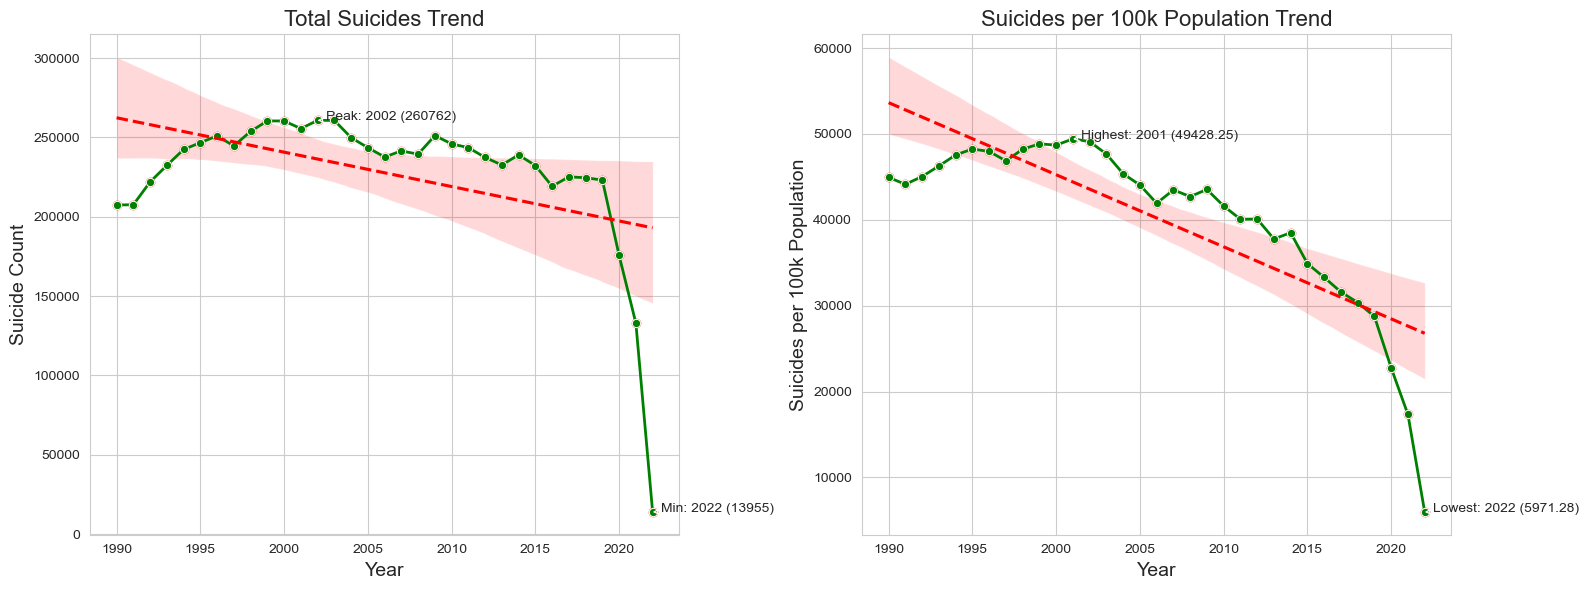

In [48]:
# Get year-wise totals
year_totals_count = df.groupby('Year')['SuicideCount'].sum().reset_index()
year_totals_rate = df.groupby('Year')['DeathRatePer100K'].sum().reset_index()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define a consistent color palette
palette = 'Paired'  # Changed color palette

# Plot for Suicides Count
sns.set_style('whitegrid')
lineplot_count = sns.lineplot(
    x='Year',
    y='SuicideCount',
    data=year_totals_count,
    marker='o',
    color='green',  # Changed color
    ax=axes[0],
    linewidth=2  # Adjust line width
)

# Annotate peak year
max_year = year_totals_count[year_totals_count['SuicideCount'] == year_totals_count['SuicideCount'].max()]
min_year = year_totals_count[year_totals_count['SuicideCount'] == year_totals_count['SuicideCount'].min()]
axes[0].annotate(
    f"Peak: {max_year['Year'].values[0]} ({max_year['SuicideCount'].values[0]:.0f})",
    xy=(max_year['Year'].values[0], max_year['SuicideCount'].values[0]),
    xytext=(max_year['Year'].values[0] + 0.5, max_year['SuicideCount'].values[0] + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

axes[0].annotate(
    f"Min: {min_year['Year'].values[0]} ({min_year['SuicideCount'].values[0]:.0f})",
    xy=(min_year['Year'].values[0], min_year['SuicideCount'].values[0]),
    xytext=(min_year['Year'].values[0] + 0.5, min_year['SuicideCount'].values[0] - 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

# Add trendline
sns.regplot(x='Year', y='SuicideCount', data=year_totals_count, ax=axes[0], color='r', line_kws={'linestyle':'--'})

axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Suicide Count", fontsize=14)
axes[0].set_title("Total Suicides Trend", fontsize=16)

# Plot for Suicides per 100k Population
sns.set_style('whitegrid')
lineplot_rate = sns.lineplot(
    x='Year',
    y='DeathRatePer100K',
    data=year_totals_rate,
    marker='o',
    color='green',  # Changed color
    ax=axes[1],
    linewidth=2  # Adjust line width
)

# Highlight and annotate years with highest and lowest rates
highest_rate_year = year_totals_rate[year_totals_rate['DeathRatePer100K'] == year_totals_rate['DeathRatePer100K'].max()]
lowest_rate_year = year_totals_rate[year_totals_rate['DeathRatePer100K'] == year_totals_rate['DeathRatePer100K'].min()]

axes[1].annotate(
    f"Highest: {highest_rate_year['Year'].values[0]} ({highest_rate_year['DeathRatePer100K'].values[0]:.2f})",
    xy=(highest_rate_year['Year'].values[0], highest_rate_year['DeathRatePer100K'].values[0]),
    xytext=(highest_rate_year['Year'].values[0] + 0.5, highest_rate_year['DeathRatePer100K'].values[0] + 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

axes[1].annotate(
    f"Lowest: {lowest_rate_year['Year'].values[0]} ({lowest_rate_year['DeathRatePer100K'].values[0]:.2f})",
    xy=(lowest_rate_year['Year'].values[0], lowest_rate_year['DeathRatePer100K'].values[0]),
    xytext=(lowest_rate_year['Year'].values[0] + 0.5, lowest_rate_year['DeathRatePer100K'].values[0] - 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

# Add trendline
sns.regplot(x='Year', y='DeathRatePer100K', data=year_totals_rate, ax=axes[1], color='r', line_kws={'linestyle':'--'})

axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides per 100k Population Trend", fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
counts_per_year = df.groupby("Year")["SuicideCount"].sum().reset_index()

In [50]:
counts_per_year

,Year,SuicideCount
0,1990,207445.0
1,1991,207584.0
2,1992,221963.0
3,1993,232369.0
4,1994,242419.0
5,1995,246721.0
6,1996,250971.0
7,1997,244684.0
8,1998,253835.0
9,1999,260404.0


In [51]:
rate_per_year = round(df.groupby("Year")["DeathRatePer100K"].sum().reset_index())

In [52]:
rate_per_year

,Year,DeathRatePer100K
0,1990,44936.0
1,1991,44139.0
2,1992,45044.0
3,1993,46271.0
4,1994,47557.0
5,1995,48247.0
6,1996,47966.0
7,1997,46867.0
8,1998,48227.0
9,1999,48849.0


In [53]:
max_year = counts_per_year[counts_per_year["SuicideCount"]==counts_per_year["SuicideCount"].max()]

In [54]:
max_year

,Year,SuicideCount
12,2002,260762.0


In [55]:
min_year = counts_per_year[counts_per_year["SuicideCount"]==counts_per_year["SuicideCount"].min()]

In [56]:
min_year

,Year,SuicideCount
32,2022,13955.0


In [57]:
df.head(5)

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [58]:
gender_totals = df.groupby(['Year', 'Sex']).agg({'SuicideCount': 'sum', 'DeathRatePer100K': 'sum'}).reset_index()
gender_totals 

,Year,Sex,SuicideCount,DeathRatePer100K
0,1990,Female,53930.0,10447.617076
1,1990,Male,153515.0,34488.057403
2,1991,Female,52130.0,10147.947697
3,1991,Male,155454.0,33991.425589
4,1992,Female,54223.0,10565.933265
...,...,...,...,...
87,2021,Female,31754.0,3510.557363
88,2021,Male,101172.0,13818.035781
89,2021,Unknown,29.0,0.000000
90,2022,Female,3588.0,1340.332780


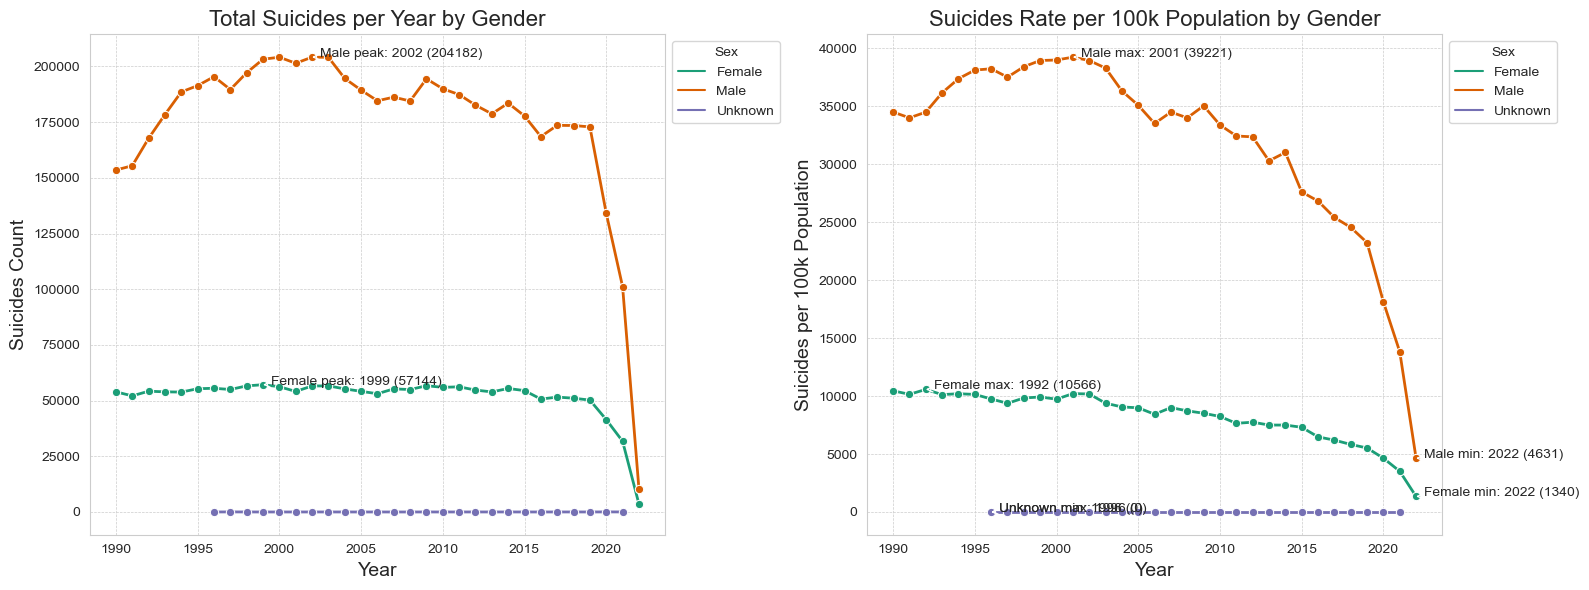

In [59]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define consistent style parameters
palette = 'Dark2'  # Changed to a darker color palette
line_width = 2

# Plot for Suicides Count (stacked)
sns.set_style('whitegrid')
lineplot_count = sns.lineplot(
    x='Year', y='SuicideCount', hue='Sex', data=gender_totals,
    marker='o', palette=palette, ax=axes[0], linewidth=line_width
)
axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Suicides Count", fontsize=14)
axes[0].set_title("Total Suicides per Year by Gender", fontsize=16)

# Plot for Suicides per 100k Population (stacked)
sns.set_style('whitegrid')
lineplot_rate = sns.lineplot(
    x='Year', y='DeathRatePer100K', hue='Sex', data=gender_totals,
    marker='o', palette=palette, ax=axes[1], linewidth=line_width
)
axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides Rate per 100k Population by Gender", fontsize=16)

# Annotate significant increases/decreases for each gender in the Suicides Count plot
threshold = 100  # Adjust as needed
for gender in gender_totals['Sex'].unique():
    max_years_gender = gender_totals[gender_totals['Sex'] == gender].nlargest(1, 'SuicideCount')
    min_years_gender = gender_totals[gender_totals['Sex'] == gender].nsmallest(1, 'SuicideCount')
    max_year = max_years_gender.iloc[0]['Year']
    min_year = min_years_gender.iloc[0]['Year']
    max_count = max_years_gender.iloc[0]['SuicideCount']
    min_count = min_years_gender.iloc[0]['SuicideCount']
    if max_count - min_count >= threshold:
        axes[0].annotate(f"{gender} peak: {max_year} ({max_count:.0f})", xy=(max_year, max_count),
                        xytext=(max_year + 0.5, max_count + 50), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Annotate maximum and minimum peaks for each gender in the Suicides Rate per 100k Population plot
for gender in gender_totals['Sex'].unique():
    max_years_gender = gender_totals[gender_totals['Sex'] == gender].nlargest(1, 'DeathRatePer100K')
    min_years_gender = gender_totals[gender_totals['Sex'] == gender].nsmallest(1, 'DeathRatePer100K')
    max_year = max_years_gender.iloc[0]['Year']
    min_year = min_years_gender.iloc[0]['Year']
    max_rate = max_years_gender.iloc[0]['DeathRatePer100K']
    min_rate = min_years_gender.iloc[0]['DeathRatePer100K']
    axes[1].annotate(f"{gender} max: {max_year} ({max_rate:.0f})", xy=(max_year, max_rate),
                    xytext=(max_year + 0.5, max_rate + 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[1].annotate(f"{gender} min: {min_year} ({min_rate:.0f})", xy=(min_year, min_rate),
                    xytext=(min_year + 0.5, min_rate - 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set legend outside the plot area
axes[0].legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust and show plot
for ax in axes:
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# The impact of geographical location on suicide rates

In [60]:
df_standard = pd.read_csv(r"E:\Projects\Sucide rates\age_std_suicide_rates_1990-2022.csv")

In [61]:
df_standard.head(5)

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [62]:
df_pivoted_tot = df_standard.pivot_table(index='Year', columns='CountryName', values='SuicideCount', aggfunc='sum')

In [63]:
df_pivoted_tot

CountryName,Albania,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,...,Thailand,Trinidad and Tobago,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of)
Year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,1.0,2153.0,93.0,2202.0,1825.0,114.0,NaN,NaN,16.0,...,3801.0,170.0,298.0,10693.0,NaN,4643.0,30906.0,318.0,1467.0,982.0
1991,NaN,0.0,1961.0,80.0,2288.0,1769.0,134.0,NaN,NaN,17.0,...,3602.0,148.0,275.0,10743.0,NaN,4547.0,30810.0,NaN,1404.0,NaN
1992,47.0,0.0,2209.0,83.0,2252.0,1759.0,144.0,NaN,NaN,14.0,...,3602.0,163.0,271.0,11731.0,NaN,4628.0,30484.0,NaN,1348.0,959.0
1993,73.0,1.0,2249.0,106.0,2039.0,1704.0,119.0,7.0,NaN,16.0,...,NaN,174.0,241.0,12541.0,NaN,4462.0,31102.0,420.0,1356.0,966.0
1994,52.0,0.0,2258.0,112.0,2283.0,1776.0,47.0,3.0,NaN,14.0,...,2333.0,148.0,234.0,13907.0,NaN,4380.0,31142.0,408.0,1420.0,1089.0
1995,91.0,0.0,2215.0,130.0,2170.0,1788.0,49.0,3.0,NaN,17.0,...,4291.0,184.0,244.0,14587.0,NaN,4315.0,31284.0,429.0,1486.0,NaN
1996,92.0,NaN,2245.0,87.0,2426.0,1779.0,69.0,3.0,NaN,NaN,...,4531.0,146.0,283.0,15258.0,NaN,4165.0,30903.0,400.0,1701.0,1009.0
1997,176.0,NaN,2247.0,77.0,2646.0,1592.0,107.0,2.0,0.0,NaN,...,4185.0,160.0,333.0,14978.0,NaN,4143.0,30535.0,462.0,1554.0,1076.0
1998,165.0,0.0,2359.0,66.0,2633.0,1559.0,56.0,3.0,0.0,NaN,...,4964.0,171.0,406.0,14860.0,NaN,4389.0,30575.0,525.0,1620.0,1144.0


In [64]:
# Adding suicide counts for each country
country_suicide_totals = df_pivoted_tot.sum()

In [65]:
# Top 10 countries with the highest total suicide numbers
top_10_cont = country_suicide_totals.nlargest(10) 

In [66]:
top_10_cont.index

Index(['Russian Federation', 'United States of America', 'Japan', 'Germany',
       'Republic of Korea', 'France', 'Ukraine', 'Brazil', 'Poland', 'Mexico'],
      dtype='object', name='CountryName')

In [67]:
# Filtering the DataFrame to include only the top 10 countries
df_top_10 = df_pivoted_tot[top_10_cont.index]

In [68]:
df_top_10

CountryName,Russian Federation,United States of America,Japan,Germany,Republic of Korea,France,Ukraine,Brazil,Poland,Mexico
Year,,,,,,,,,,
1990,39150.0,30906.0,20088.0,13924.0,3159.0,11403.0,10693.0,4843.0,4970.0,1938.0
1991,39388.0,30810.0,19875.0,14010.0,3069.0,11502.0,10743.0,5182.0,5316.0,2114.0
1992,46125.0,30484.0,20893.0,13458.0,3533.0,11644.0,11731.0,5252.0,5713.0,2246.0
1993,56136.0,31102.0,20516.0,12690.0,4124.0,12251.0,12541.0,5547.0,5624.0,2358.0
1994,61886.0,31142.0,20923.0,12718.0,4212.0,12041.0,13907.0,5931.0,5519.0,2603.0
1995,60953.0,31284.0,21426.0,12888.0,4930.0,11819.0,14587.0,6584.0,5499.0,2892.0
1996,57812.0,30903.0,22143.0,12225.0,5959.0,11279.0,15258.0,6748.0,5446.0,3018.0
1997,55031.0,30535.0,23502.0,12256.0,6127.0,11139.0,14978.0,6932.0,NaN,3369.0
1998,51770.0,30575.0,31758.0,11654.0,8699.0,10534.0,14860.0,6986.0,NaN,3342.0


In [69]:
df_top_10.index = df_top_10.index.astype(str)

# Showing the final DataFrame
df_top_10.head()

CountryName,Russian Federation,United States of America,Japan,Germany,Republic of Korea,France,Ukraine,Brazil,Poland,Mexico
Year,,,,,,,,,,
1990,39150.0,30906.0,20088.0,13924.0,3159.0,11403.0,10693.0,4843.0,4970.0,1938.0
1991,39388.0,30810.0,19875.0,14010.0,3069.0,11502.0,10743.0,5182.0,5316.0,2114.0
1992,46125.0,30484.0,20893.0,13458.0,3533.0,11644.0,11731.0,5252.0,5713.0,2246.0
1993,56136.0,31102.0,20516.0,12690.0,4124.0,12251.0,12541.0,5547.0,5624.0,2358.0
1994,61886.0,31142.0,20923.0,12718.0,4212.0,12041.0,13907.0,5931.0,5519.0,2603.0


In [70]:
# Minimum and Maximum Years
min_year = df_top_10.min()
max_year = df_top_10.max()

In [71]:
max_year

CountryName
Russian Federation          61886.0
United States of America    48344.0
Japan                       32118.0
Germany                     14010.0
Republic of Korea           15906.0
France                      12251.0
Ukraine                     15258.0
Brazil                      13841.0
Poland                       6477.0
Mexico                       8337.0
dtype: float64

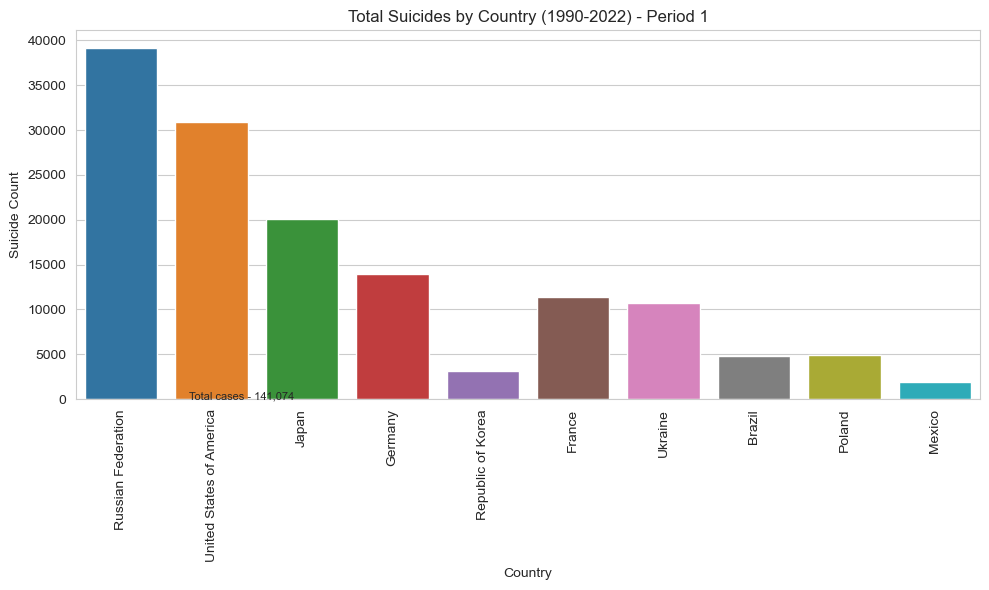

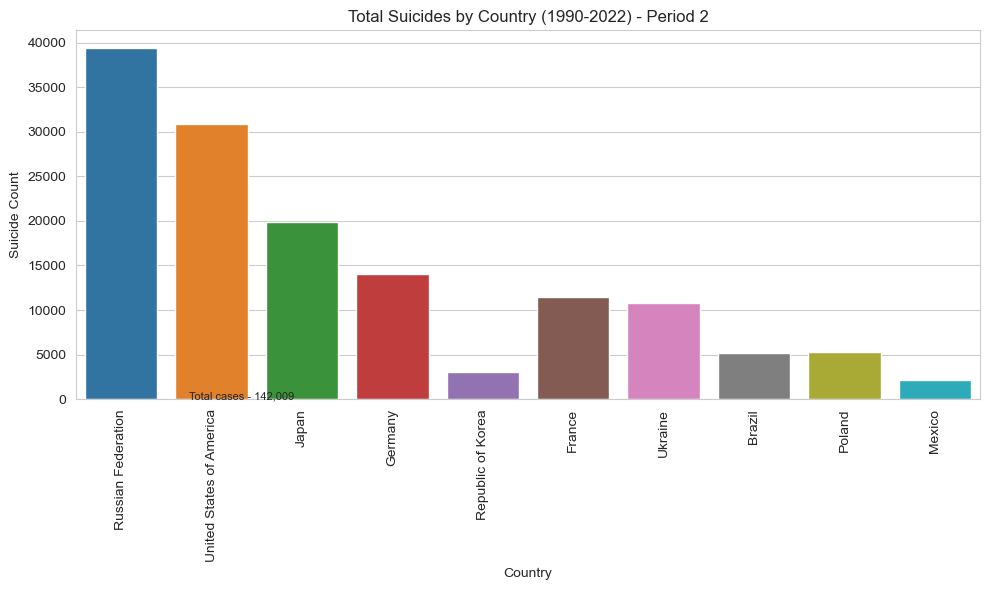

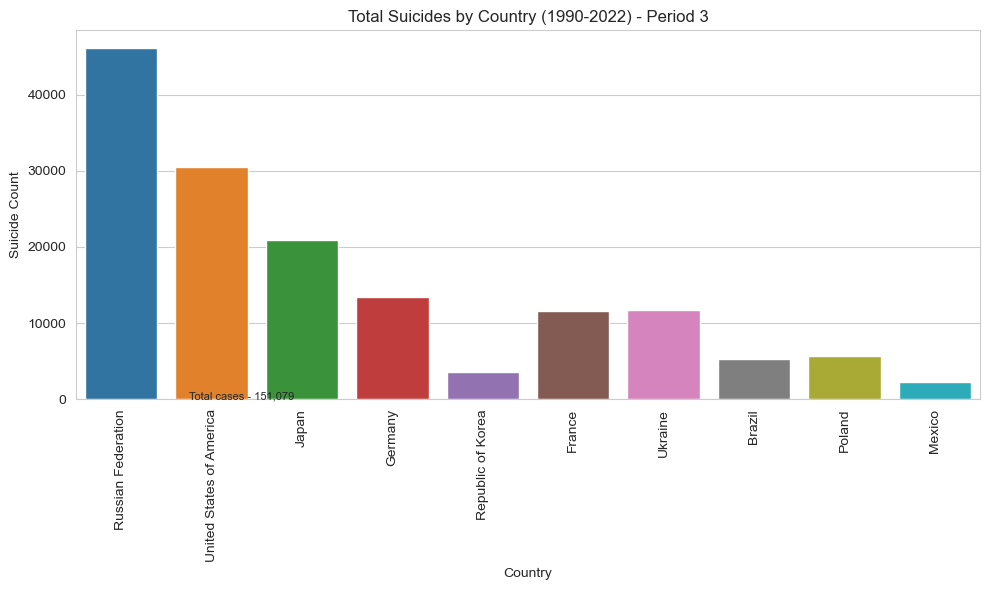

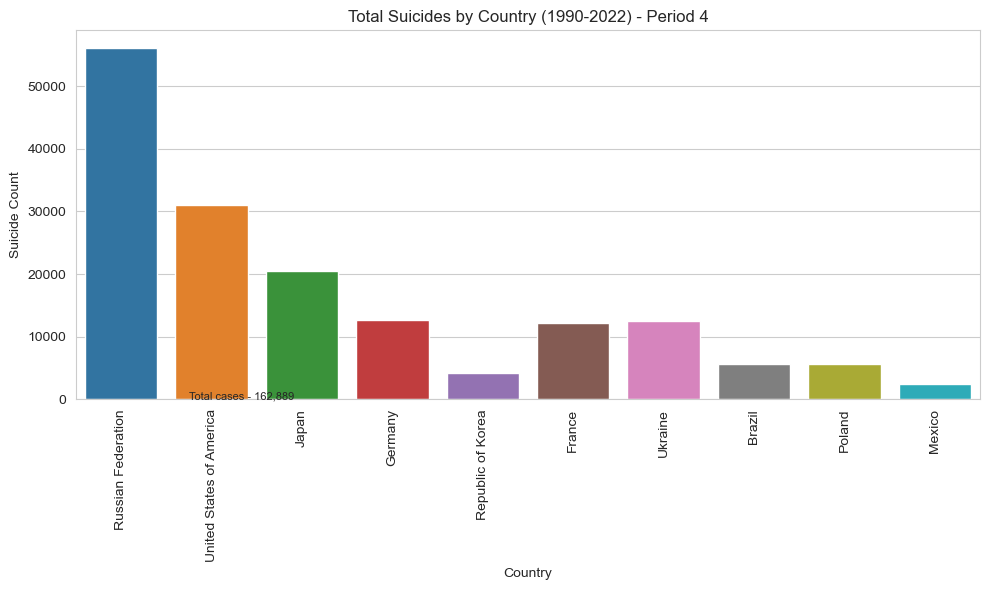

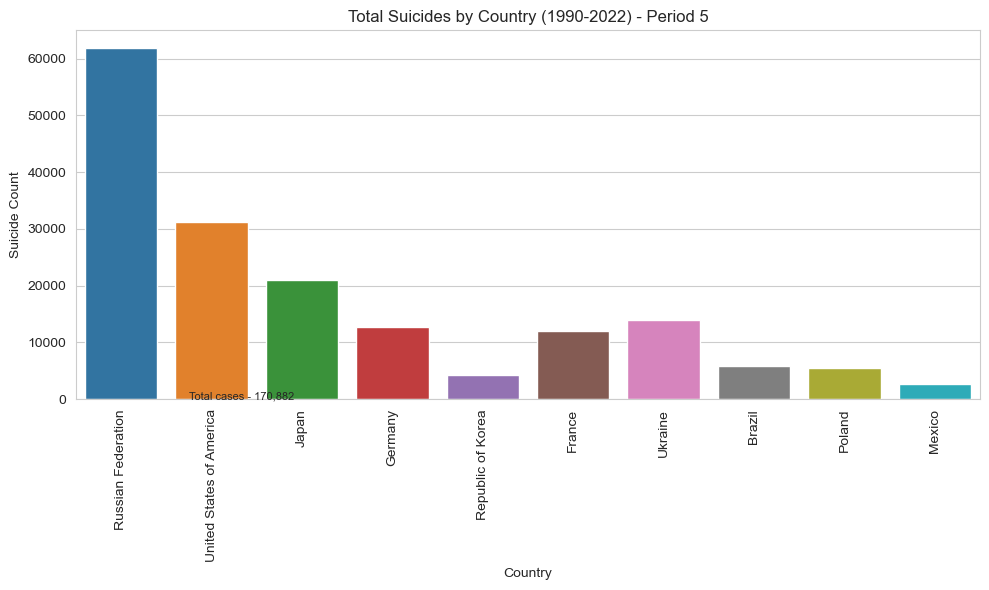

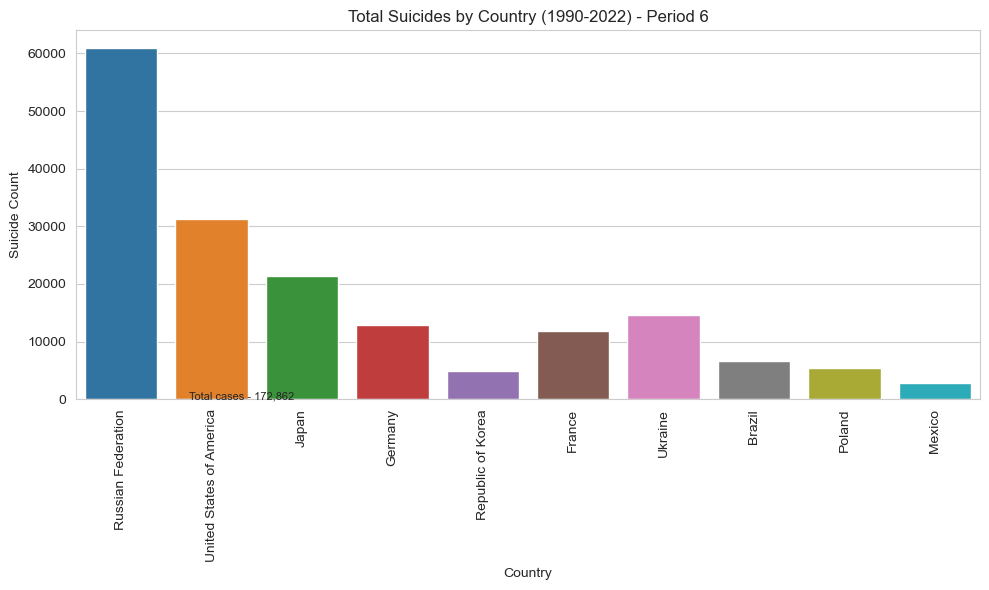

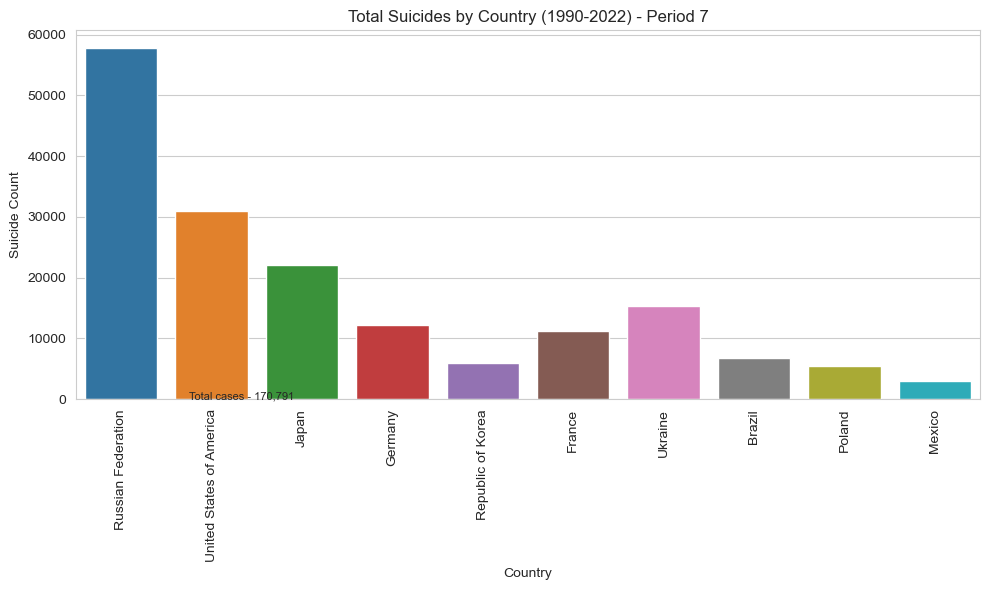

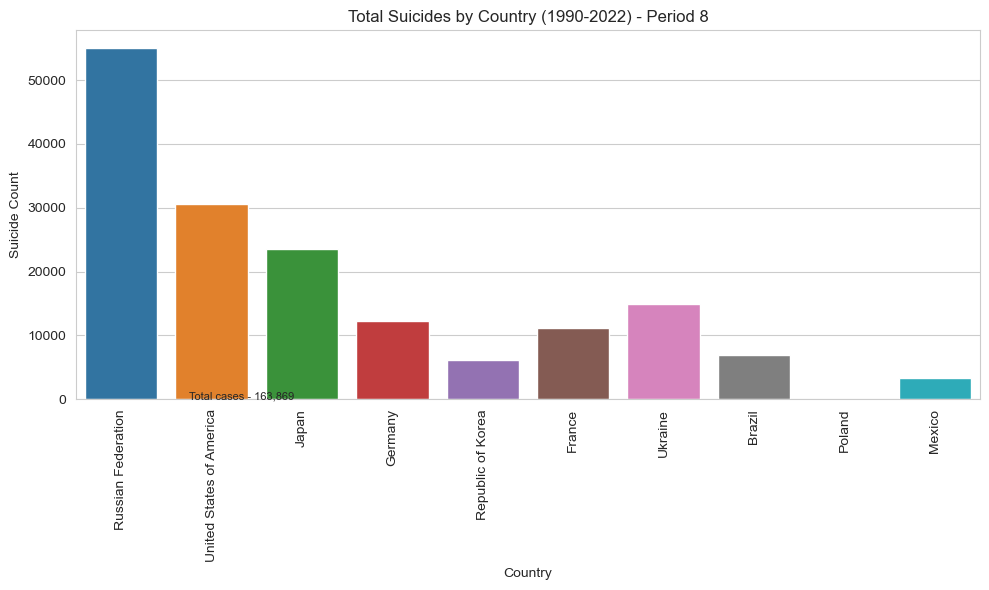

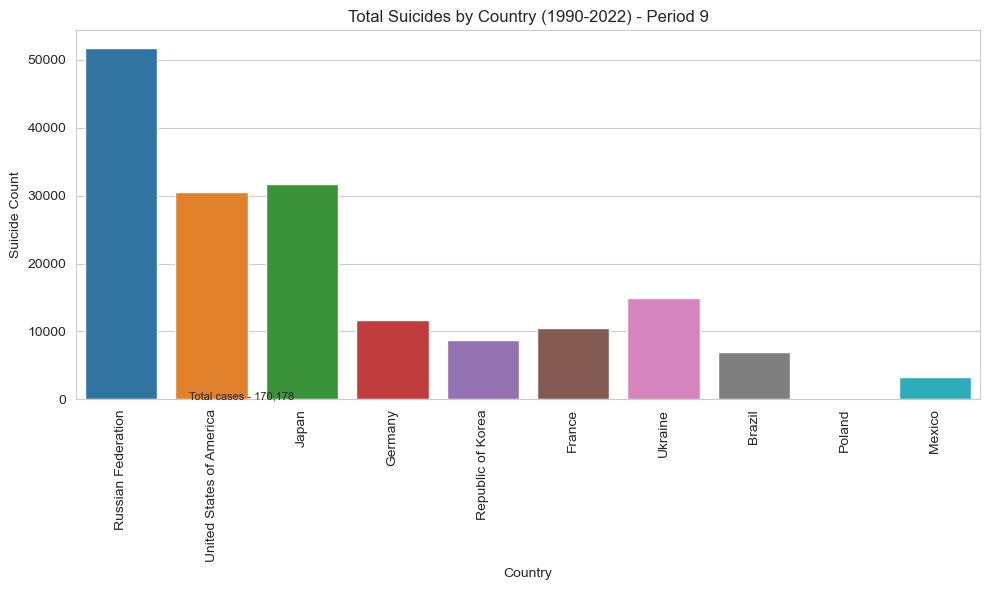

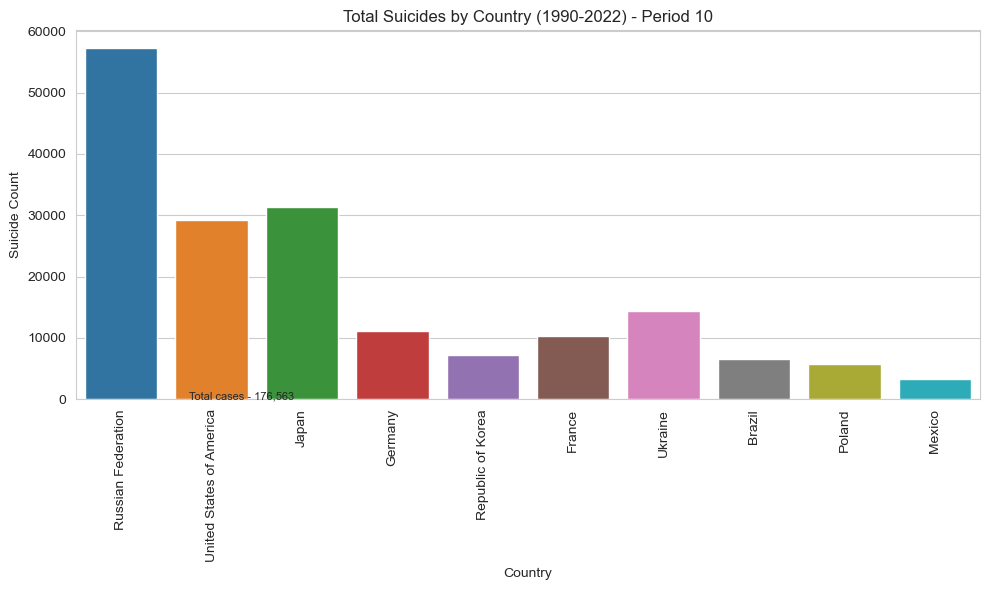

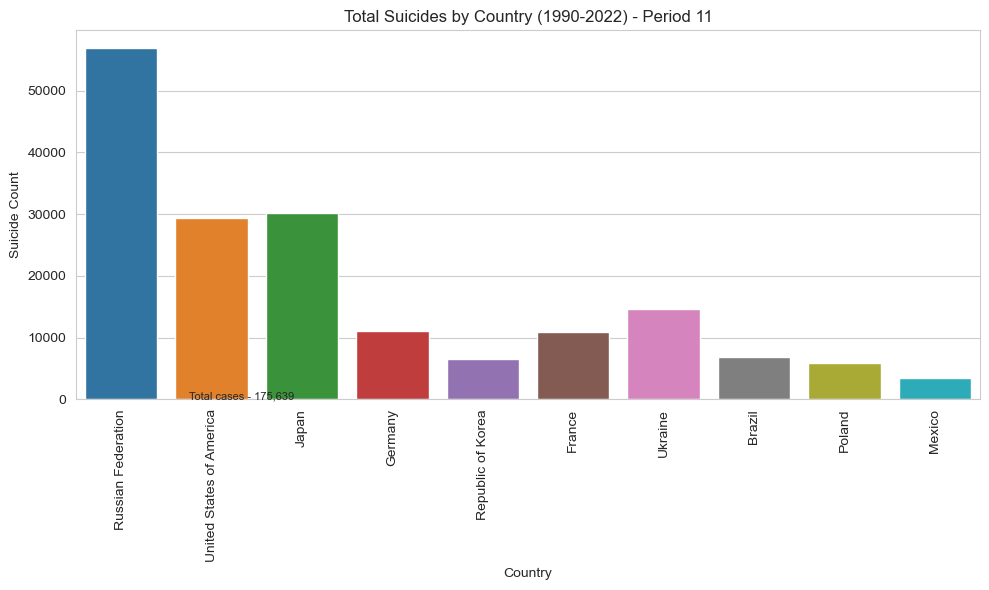

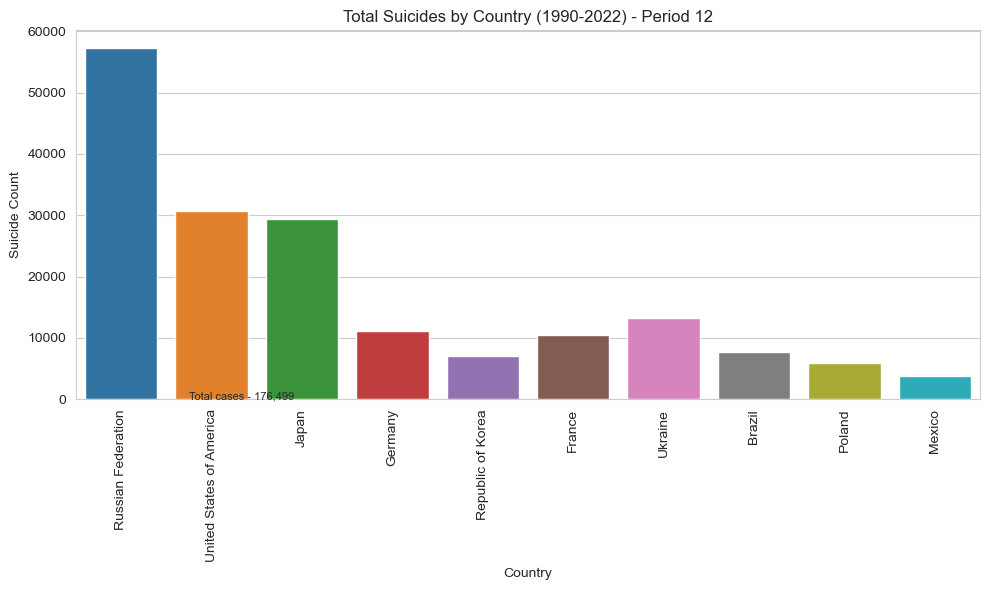

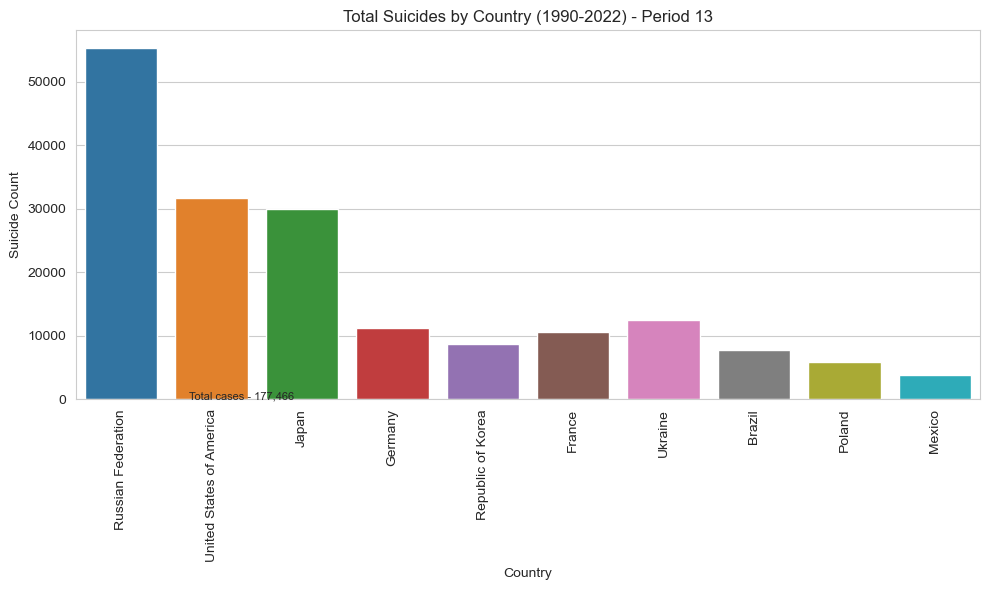

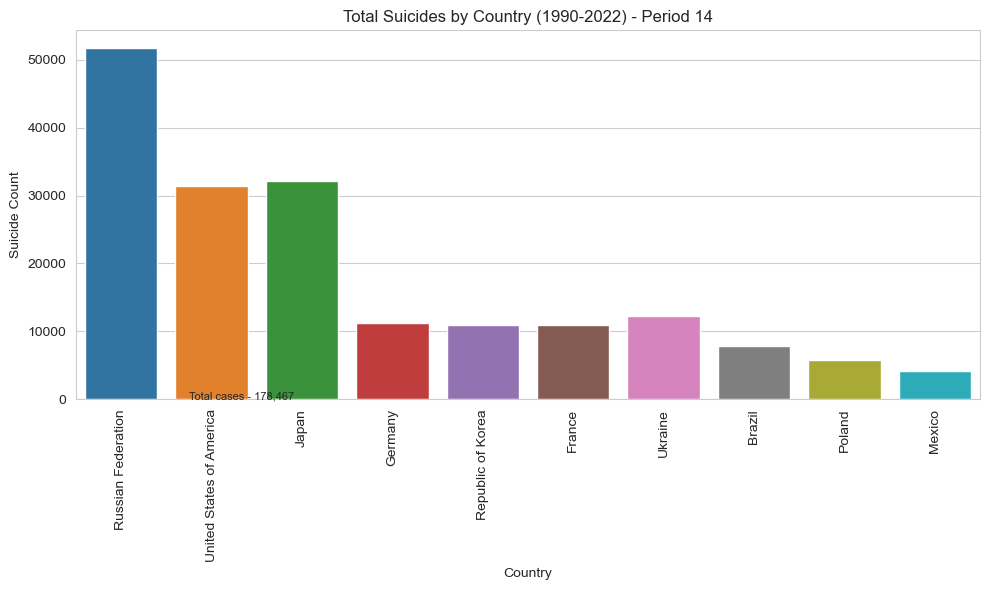

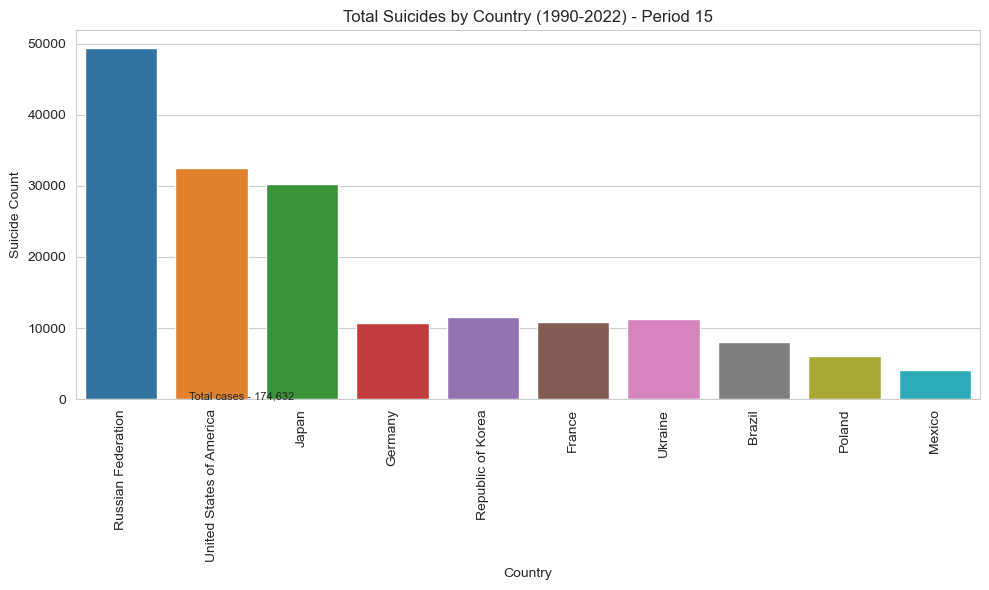

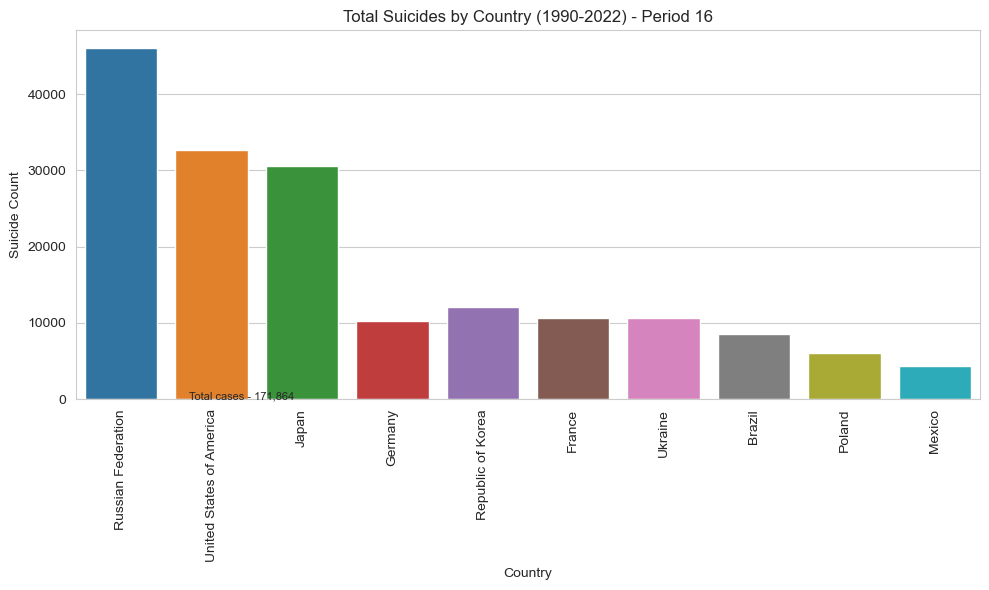

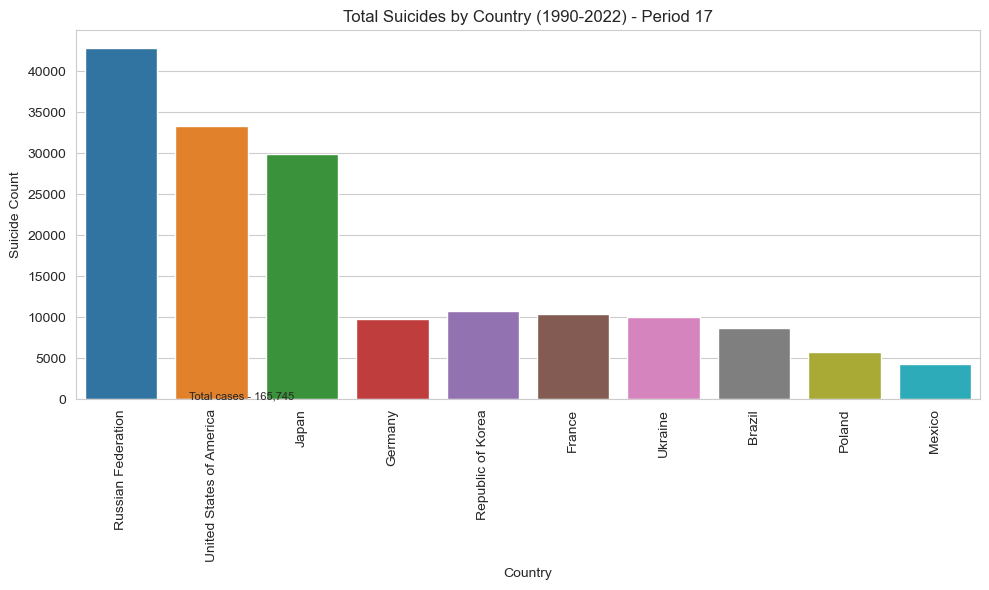

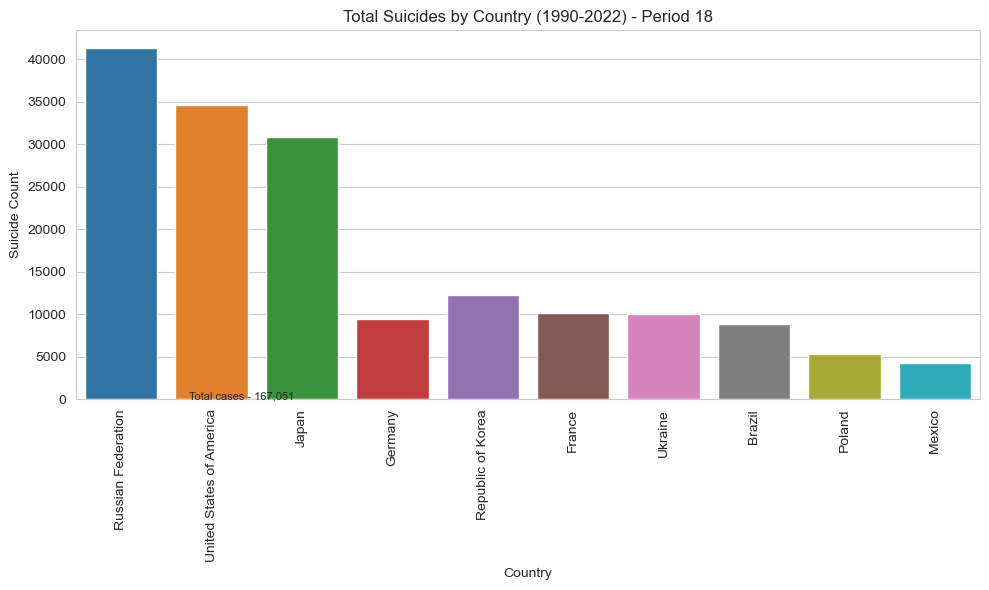

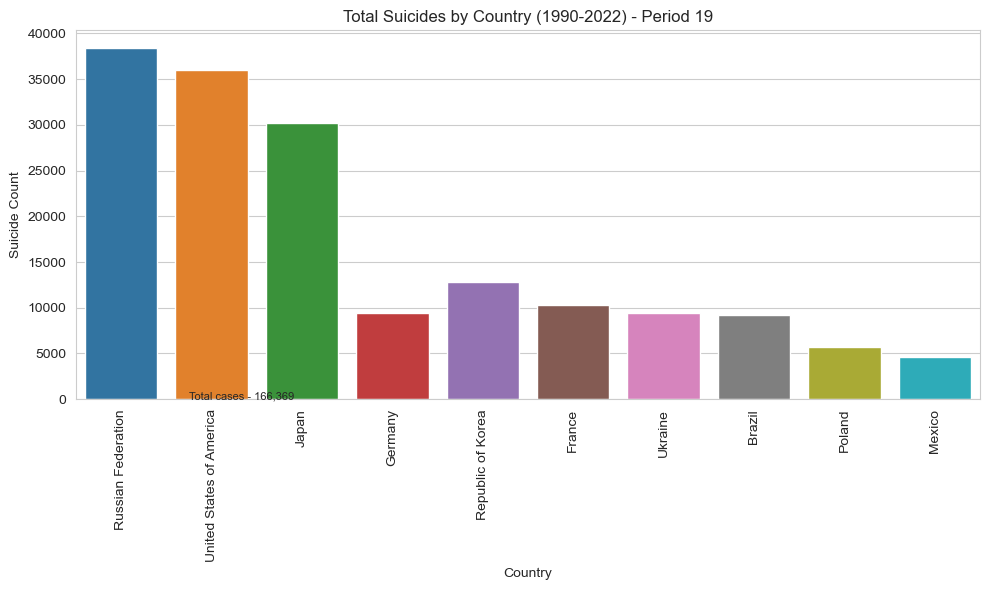

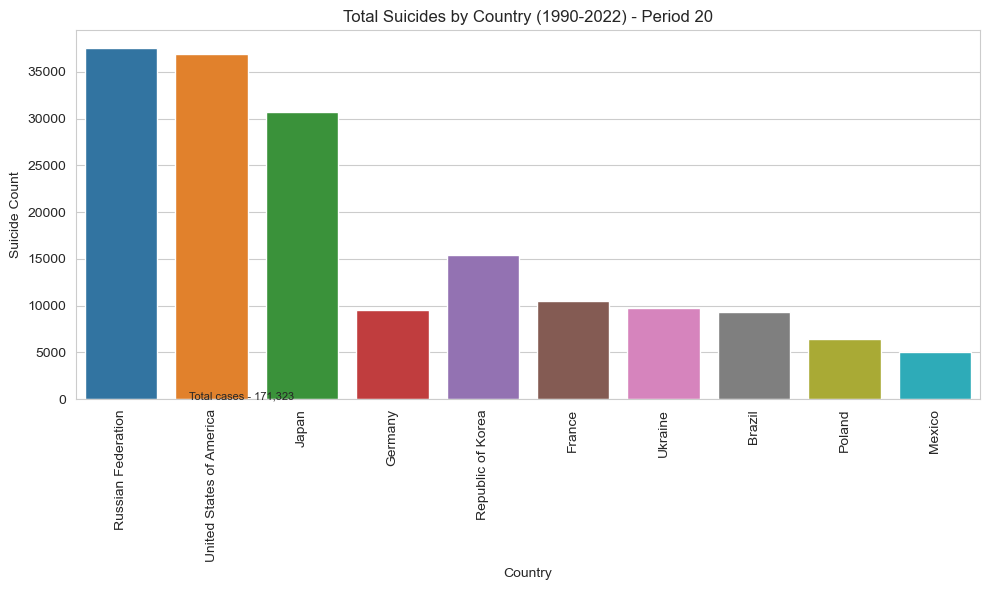

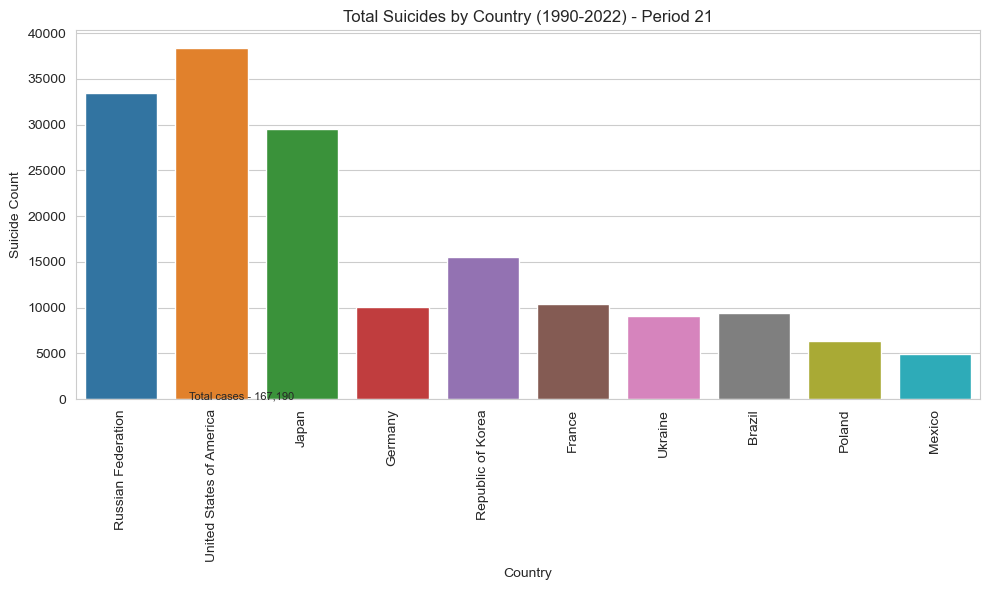

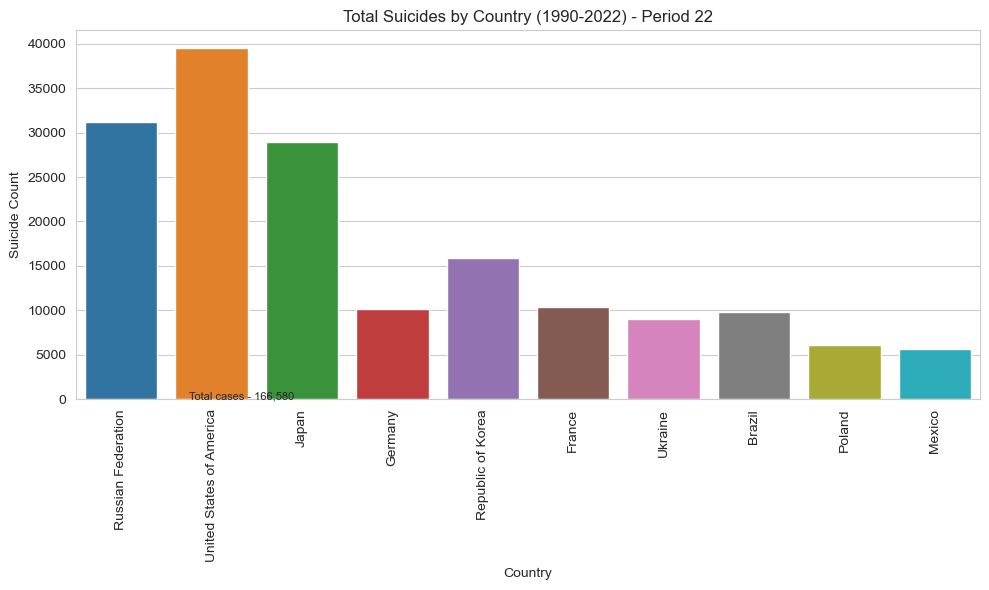

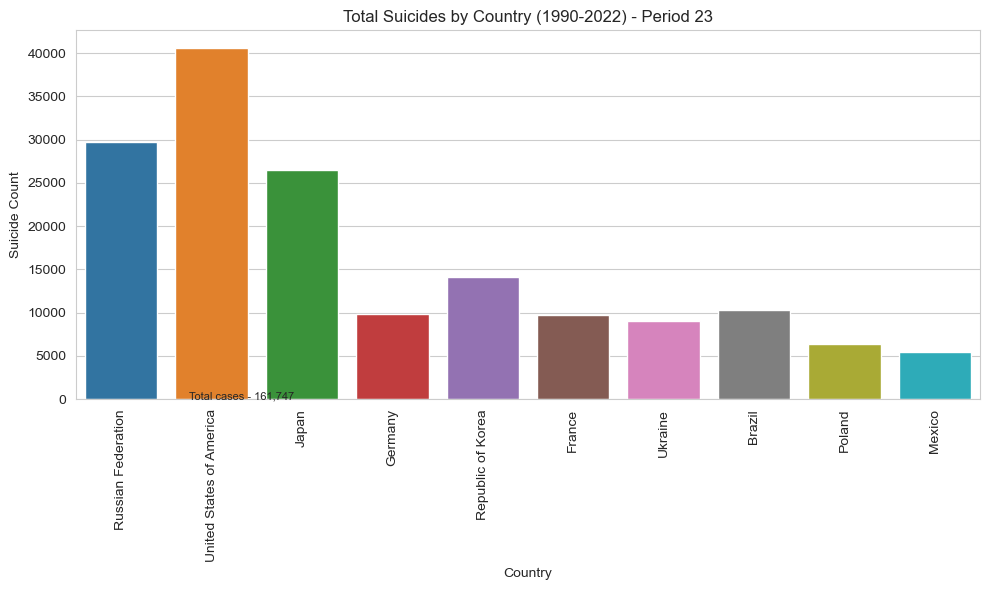

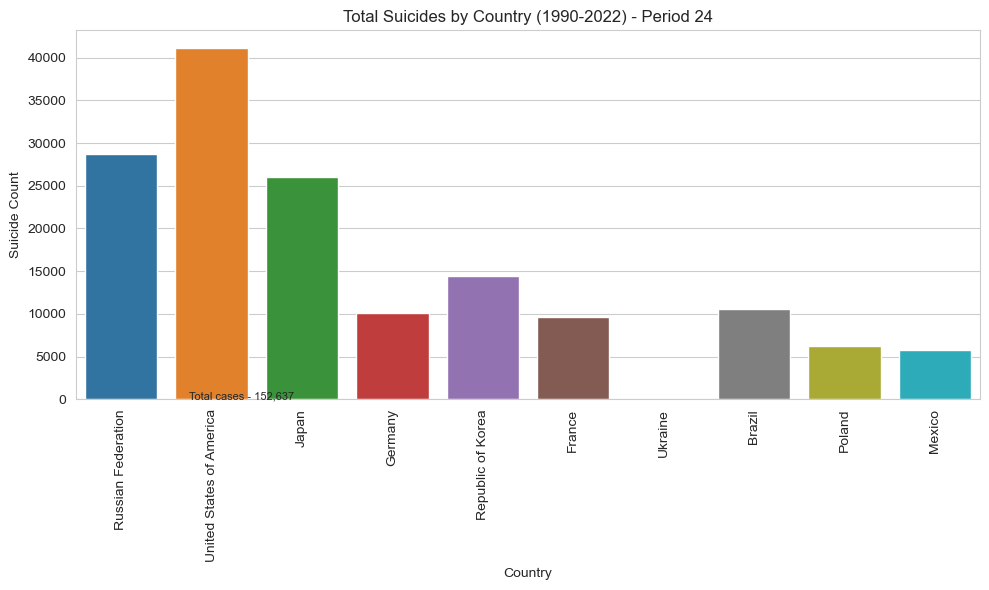

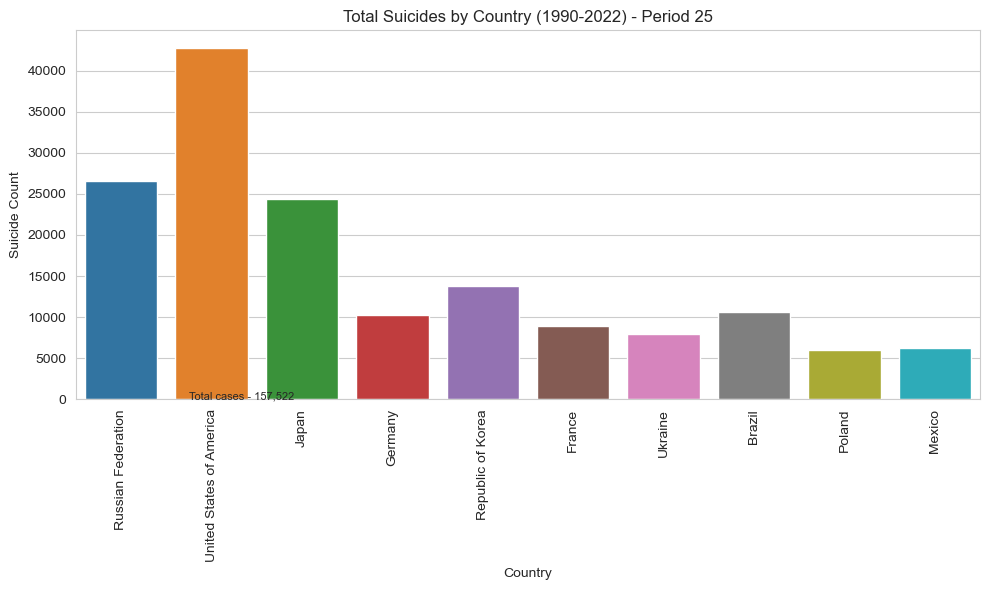

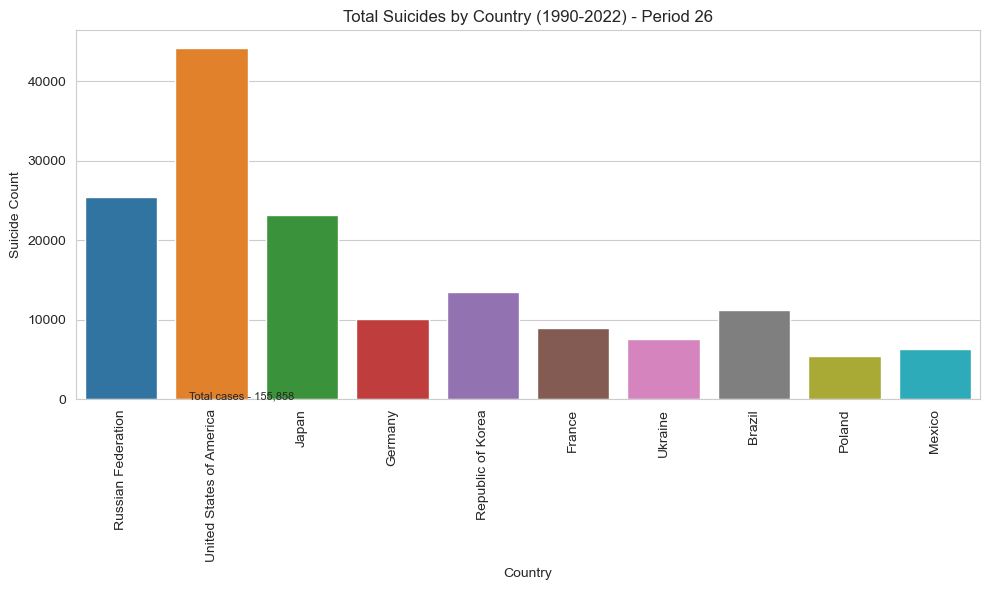

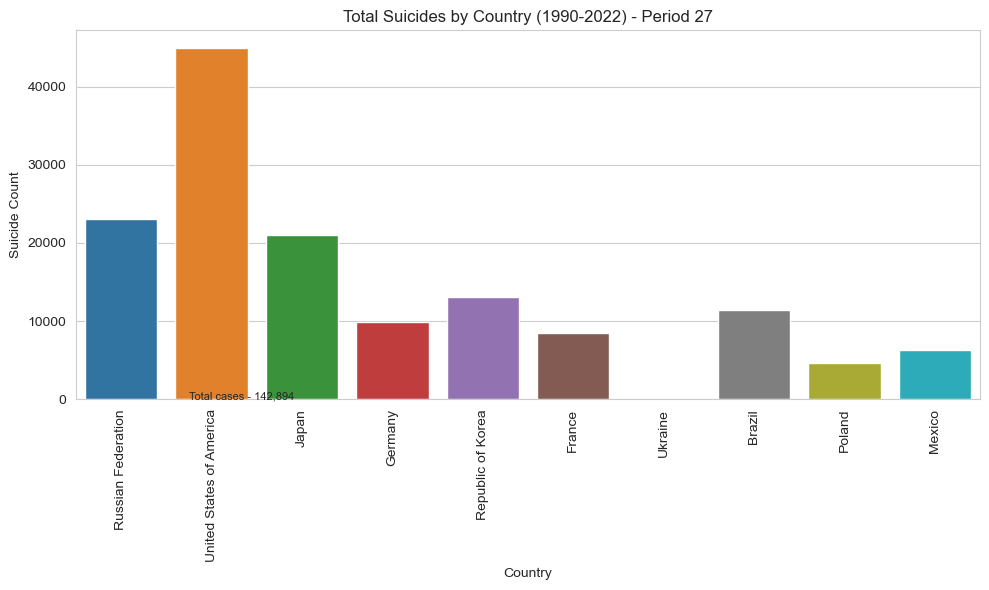

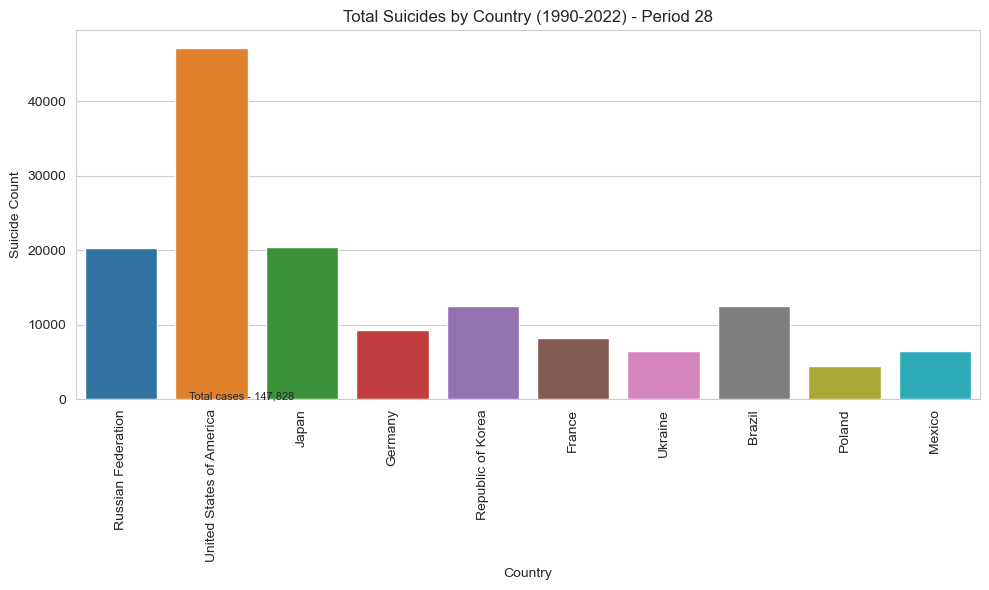

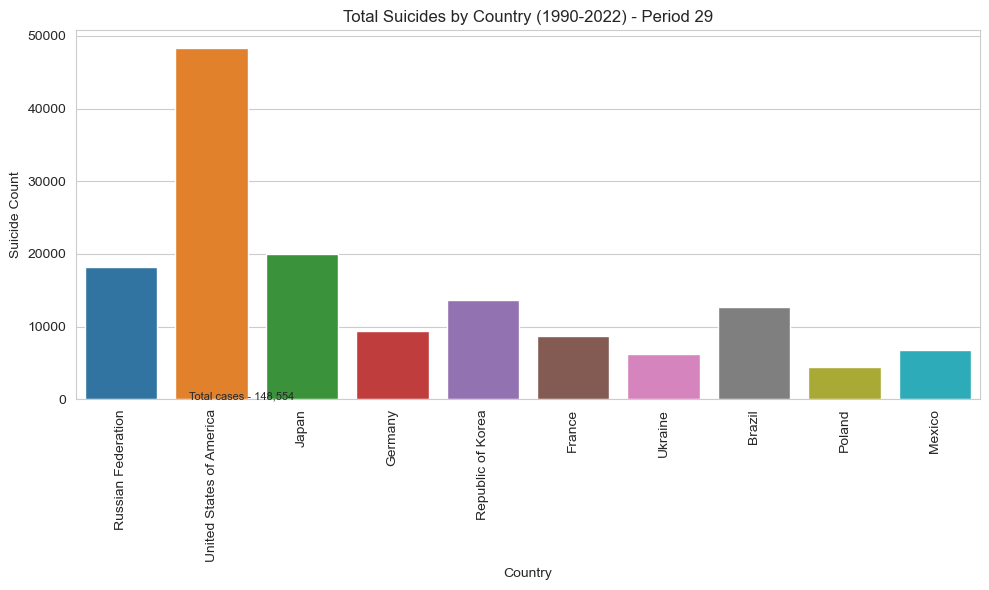

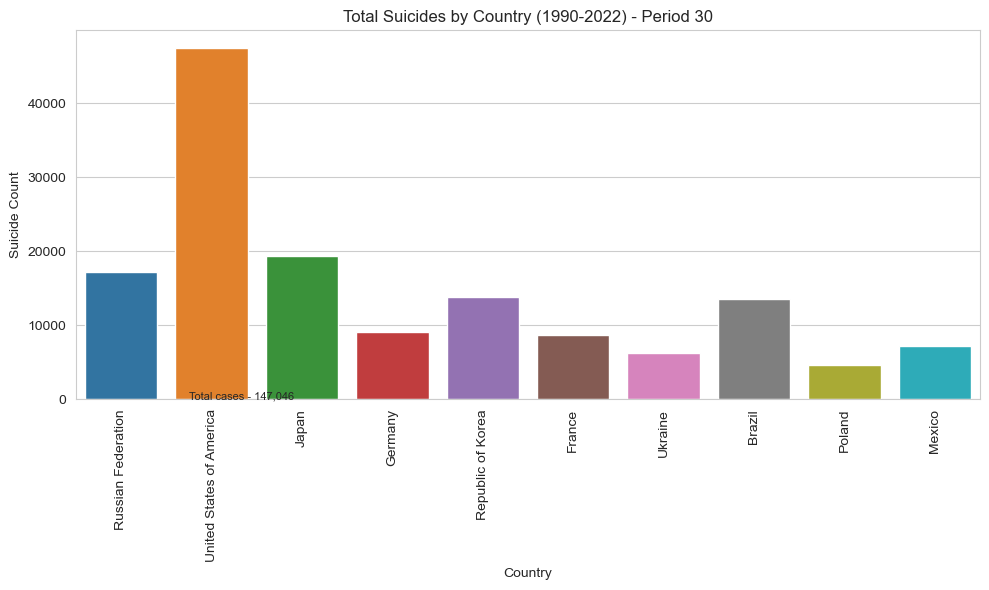

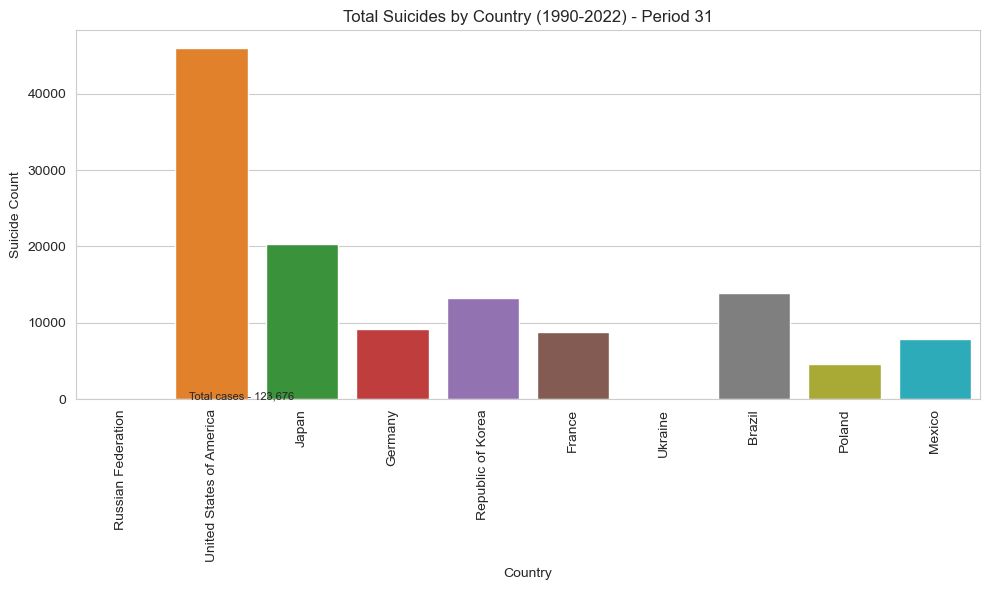

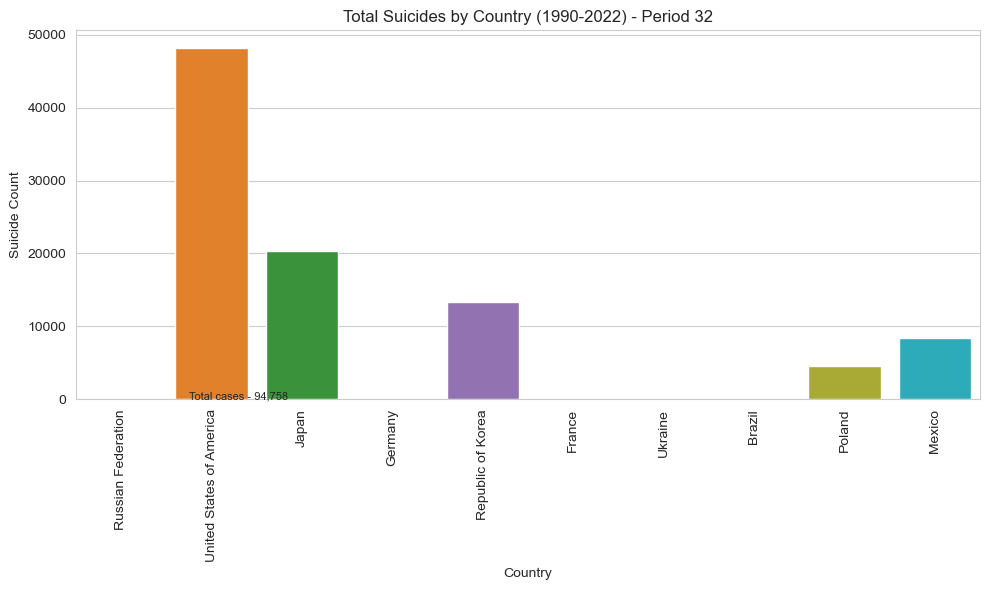

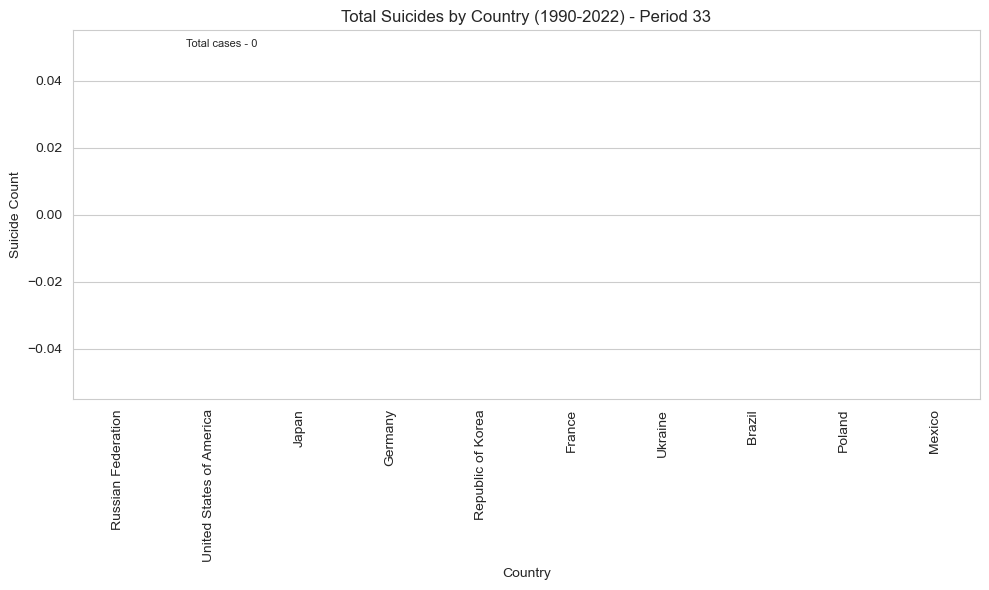

In [72]:
min_year = df_top_10.index.min()
max_year = df_top_10.index.max()

# Define the period summary function to include min and max years
def period_summary(values, ranks):
    total_suicides = values.sum()
    s = f"Total cases - {total_suicides:,.0f}"
    plt.text(.75, .05, s, fontsize=8)

# Set the style
sns.set_style("whitegrid")

# Iterate over periods and plot each frame
for i, (index, data) in enumerate(df_top_10.iterrows()):
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.barplot(x=data.index, y=data.values)
    period_summary(data, None)
    plt.title(f"Total Suicides by Country ({min_year}-{max_year}) - Period {i+1}")
    plt.xlabel("Country")
    plt.ylabel("Suicide Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# Geographical data

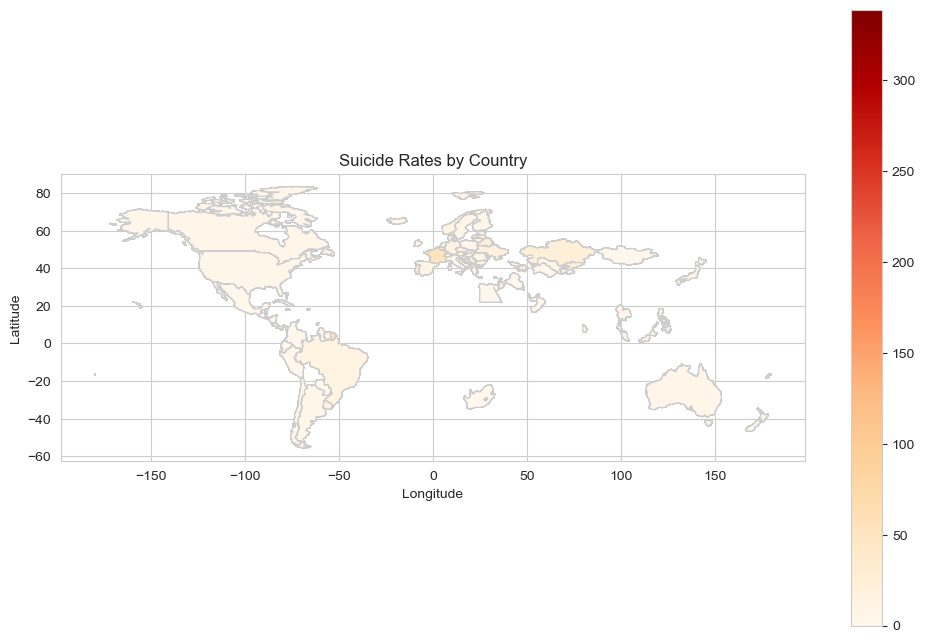

In [73]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your dataset with the world map data
merged_data = world.merge(df, how='left', left_on='name', right_on='CountryName')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='DeathRatePer100K', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Suicide Rates by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend with appropriate label
legend = ax.get_legend()

# Show plot
plt.show()

# Trends by Gender

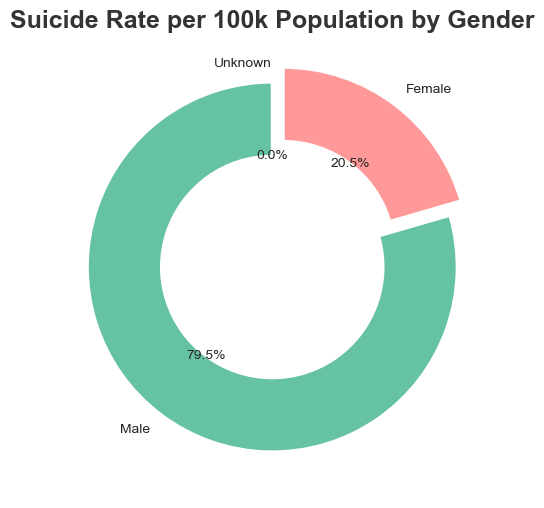

In [74]:
gender_sum = df.groupby('Sex')['DeathRatePer100K'].sum()
# Create a subplot to avoid axis ticks and labels
fig, ax = plt.subplots(figsize=(6, 6))

# Use a different color palette
colors = ['#ff9999', '#66c2a5', '#8da0cb']  # Coral, Green, and Blue
labels = ['Female', 'Male', 'Unknown']

# Plot the pie chart with shadow and improved styling
wedgeprops = dict(width=0.4, edgecolor='w', linewidth=2)
explode = (0.1, 0, 0)  # Explode the first slice (Female) for emphasis
ax.pie(
    gender_sum,
    labels=labels,
    autopct='%.1f%%',  # Show one decimal place for percentages
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=wedgeprops,
    explode=explode,
    
)

# Add title and set font style
ax.set_title(
    'Suicide Rate per 100k Population by Gender',
    fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': '#333333'},
)

# Adjust aspect ratio to be equal to make the pie circular
ax.set_aspect('equal')

# Show the plot
plt.show()


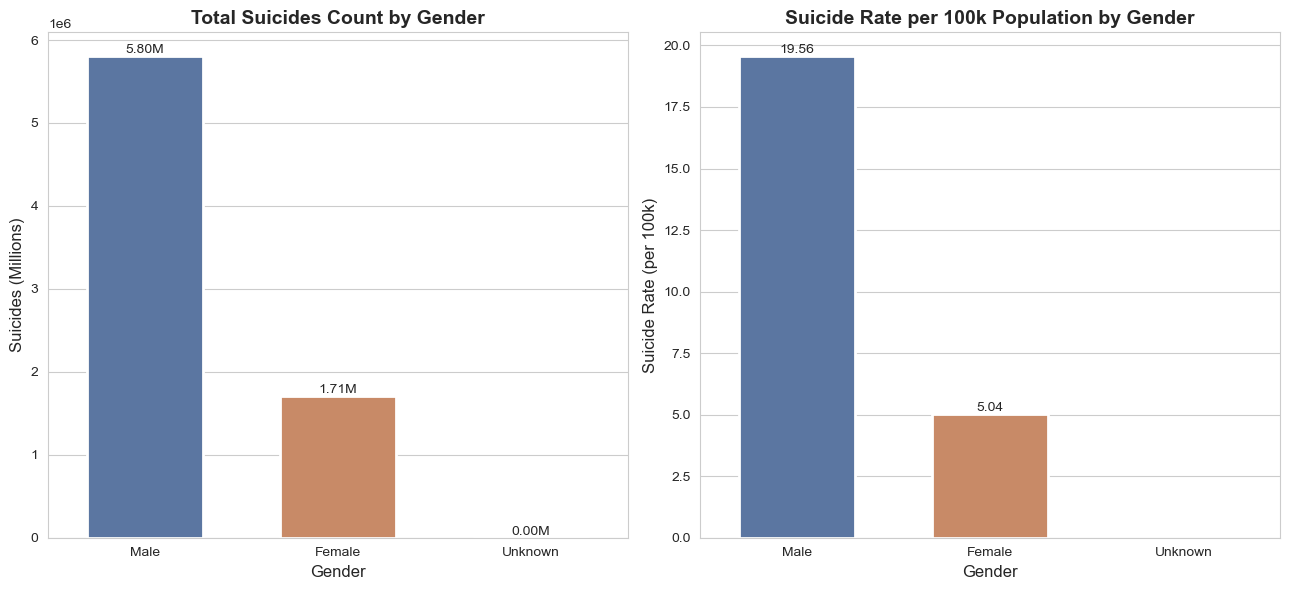

In [75]:
sns.set_style("whitegrid")

# Create a figure and subplots with appropriate sizing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

# Define bar width
bar_width = 0.6

# Plot 1: Total Suicides Count by Gender
sns.barplot(
    x="Sex",
    y="SuicideCount",
    data=df,
    ax=axes[0],
    palette="deep",  # Changed color palette
    # Add data labels for clarity
    estimator=lambda x: x.sum(),  # Optional: Calculate total for stacked bars
    errwidth=0,  # Remove error bars if not required
    # Adjust bar width
    linewidth=2,
    saturation=0.7,
    capsize=0.1,
    width=bar_width
)

# Add data labels in millions
for p in axes[0].patches:
    label = '{:.2f}M'.format(p.get_height() / 1e6)
    axes[0].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Customize title, labels, and layout for readability
axes[0].set_title("Total Suicides Count by Gender", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Gender", fontsize=12)
axes[0].set_ylabel("Suicides (Millions)", fontsize=12)

# Plot 2: Suicide Rate per 100k Population by Gender
sns.barplot(
    x="Sex",
    y="DeathRatePer100K",
    data=df,
    ax=axes[1],
    palette="deep",  # Changed color palette
    # Add data labels for clarity
    estimator=lambda x: x.mean(),  # Optional: Calculate mean for stacked bars
    errwidth=0,  # Remove error bars if not required
    # Adjust bar width
    linewidth=2,
    saturation=0.7,
    capsize=0.1,
    width=bar_width
)

# Add data labels in millions
for p in axes[1].patches:
    label = '{:.2f}'.format(p.get_height())
    axes[1].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Customize title, labels, and layout for readability
axes[1].set_title("Suicide Rate per 100k Population by Gender", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Gender", fontsize=12)
axes[1].set_ylabel("Suicide Rate (per 100k)", fontsize=12)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


# Age Influence

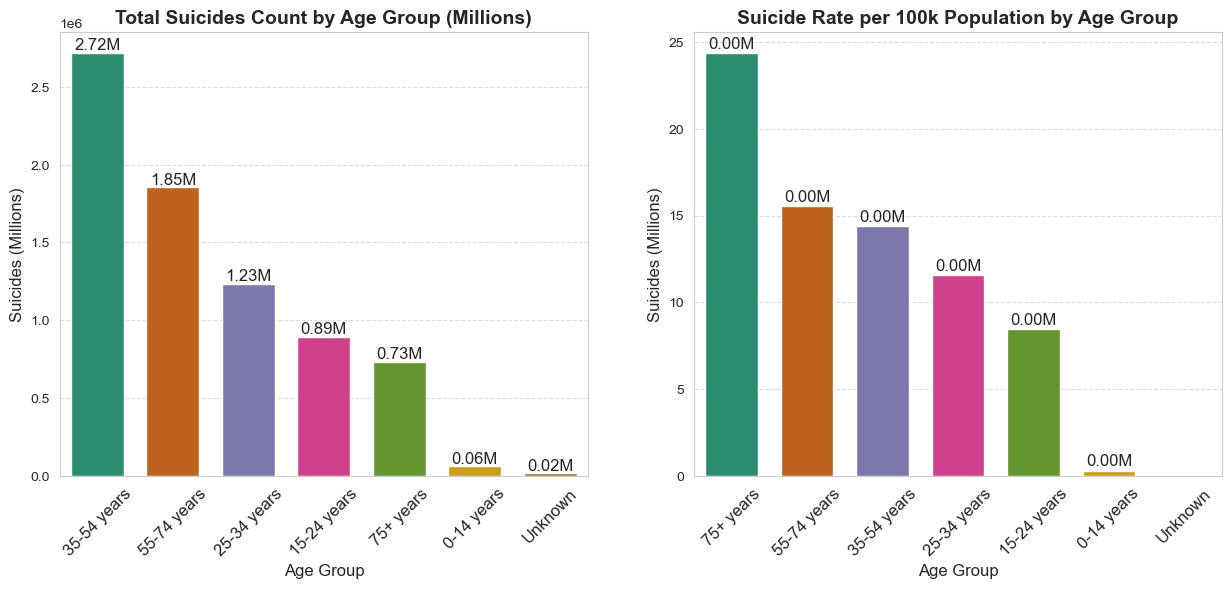

In [76]:
# Prepare data
generation_totals = df.groupby('AgeGroup')['SuicideCount'].sum().sort_values(ascending=False).reset_index()
generation_suicide_rate = df.groupby('AgeGroup')['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

# Set Seaborn color palette
sns.set_palette("Dark2")  # Changed color palette

# Set up figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.subplots_adjust(top=0.85)  # Adjust top margin for titles

# Customize styling
sns.set_style("whitegrid")  # Use Seaborn whitegrid style

# Plot barplots with data labels
sns.barplot(x='AgeGroup', y='SuicideCount', data=generation_totals, ax=axes[0], edgecolor='w', errorbar=None)
sns.barplot(x='AgeGroup', y='DeathRatePer100K', data=generation_suicide_rate, ax=axes[1], edgecolor='w', errorbar=None)

# Add labels above each bar showing millions
for ax in axes:
    for p in ax.patches:
        # Divide height by 1 million and show two decimal places
        label = format(p.get_height() / 1e6, '.2f') + 'M'
        ax.annotate(label,  # Use the formatted label
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),  # Adjust offset as needed
                    ha='center', va='bottom', fontsize=12, fontweight='normal')

# Customize titles
axes[0].set_title("Total Suicides Count by Age Group (Millions)", fontsize=14, fontweight="bold")
axes[1].set_title("Suicide Rate per 100k Population by Age Group", fontsize=14, fontweight="bold")

# Customize y-axis labels
for ax in axes:
    # Update y-axis label to reflect millions
    ax.set_ylabel("Suicides (Millions)", fontsize=12)

# Customize x-axis labels and grid
for ax in axes:
    ax.set_xlabel('Age Group', fontsize=12)  # Add x-axis label
    ax.tick_params(axis='x', bottom=False, labelsize=12, labelrotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust bar width
bar_width = 0.7
for ax in axes:
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - bar_width
        patch.set_width(bar_width)
        patch.set_x(patch.get_x() + diff * .5)

# Display plot
plt.show()


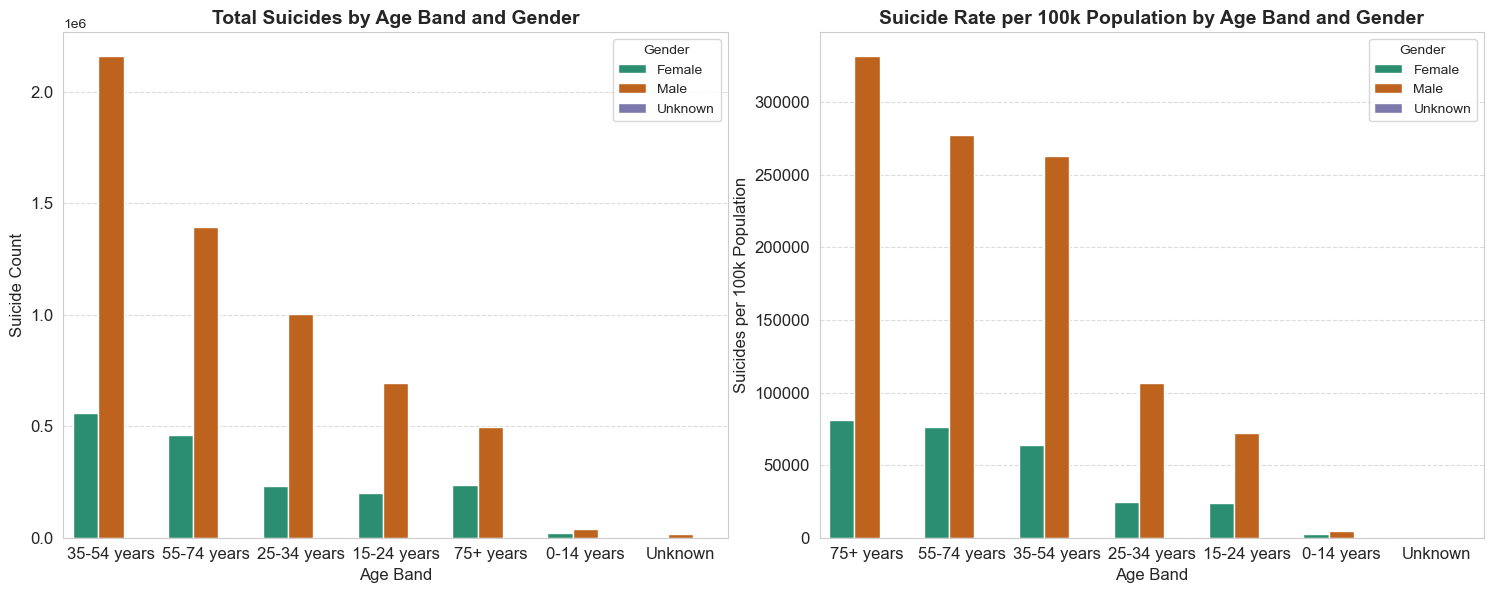

In [77]:
# Prepare data
age_band_totals_count = df.groupby(['AgeGroup', 'Sex'])['SuicideCount'].sum().reset_index()
sorted_age_band_order = df.groupby('AgeGroup')['SuicideCount'].sum().sort_values(ascending=False).index

age_band_totals_rate = df.groupby(['AgeGroup', 'Sex'])['DeathRatePer100K'].sum().reset_index()
sorted_age_band_order_rate = df.groupby('AgeGroup')['DeathRatePer100K'].sum().sort_values(ascending=False).index

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Customize Seaborn style
sns.set_style("whitegrid")  # Use Seaborn whitegrid style

# Plot for Suicides Count by Age and Gender
sns.set_palette("Dark2")  # Changed color palette
barplot_count = sns.barplot(
    x='AgeGroup',
    y='SuicideCount',
    hue='Sex',
    order=sorted_age_band_order,
    data=age_band_totals_count,
    errorbar=None,
    ax=axes[0]
)

# Customize titles and labels
axes[0].set_xlabel("Age Band", fontsize=12)
axes[0].set_ylabel("Suicide Count", fontsize=12)
axes[0].set_title("Total Suicides by Age Band and Gender", fontsize=14, fontweight="bold")
axes[0].legend(title='Gender', loc='upper right')

# Plot for Suicides per 100k Population by Age and Gender
sns.set_palette("Dark2")  # Changed color palette
barplot_rate = sns.barplot(
    x='AgeGroup',
    y='DeathRatePer100K',
    hue='Sex',
    order=sorted_age_band_order_rate,
    data=age_band_totals_rate,
    errorbar=None,
    ax=axes[1]
)

# Customize titles and labels
axes[1].set_xlabel("Age Band", fontsize=12)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=12)
axes[1].set_title("Suicide Rate per 100k Population by Age Band and Gender", fontsize=14, fontweight="bold")
axes[1].legend(title='Gender', loc='upper right')

# Adjust layout and grid
plt.tight_layout()  # Adjust spacing between plots and figure borders
for ax in axes:
    ax.tick_params(bottom=False, labelsize=12)  # Remove bottom ticks and adjust label size
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines with slight transparency

# Display plot
plt.show()


# Generation Influence

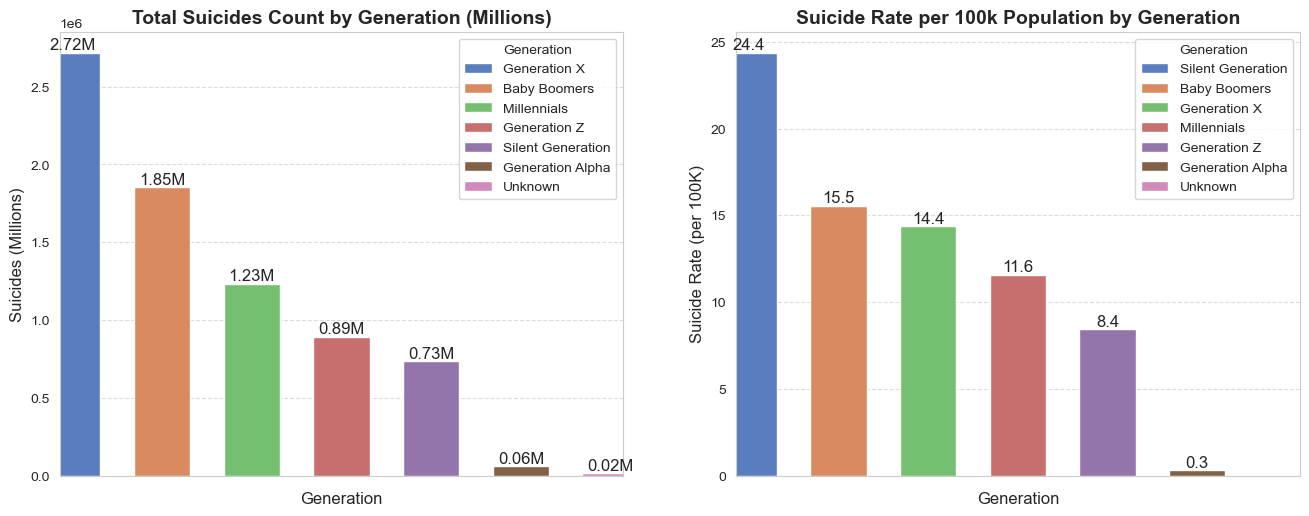

In [79]:
age_totals = df.groupby('Generation')['SuicideCount'].sum().sort_values(ascending=False).reset_index()
age_rates = df.groupby('Generation')['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

# Set Seaborn color palette
sns.set_palette("muted")  # Changed color palette

# Set up figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.subplots_adjust(top=0.85)  # Adjust top margin for titles

# Customize styling
sns.set_style("whitegrid")  # Use Seaborn whitegrid style

# Plot barplots with data labels
sns.barplot(x='Generation', y='SuicideCount', hue="Generation", data=age_totals, ax=axes[0], edgecolor='w', errorbar=None)
sns.barplot(x='Generation', y='DeathRatePer100K', hue="Generation", data=age_rates, ax=axes[1], edgecolor='w', errorbar=None)

# Add labels above each bar showing millions for suicide count
for ax in axes:
    for p in ax.patches:
        # Divide height by 1 million and show two decimal places
        if ax == axes[0]:
            label = format(p.get_height() / 1e6, '.2f') + 'M'
        else:
            # Divide height by 1 thousand and show one decimal place
            label = format(p.get_height(), '.1f')
        ax.annotate(label,  # Use the formatted label
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Align label at the top of the bar
                    ha='center', va='bottom', fontsize=12, fontweight='normal')

# Customize titles
axes[0].set_title("Total Suicides Count by Generation (Millions)", fontsize=14, fontweight="bold")
axes[1].set_title("Suicide Rate per 100k Population by Generation", fontsize=14, fontweight="bold")

# Customize y-axis labels and ticks
for ax in axes:
    # Update y-axis label to reflect millions for suicide count
    ax.set_ylabel("Suicides (Millions)" if ax == axes[0] else "Suicide Rate (per 100K)", fontsize=12)

    # Set y-tick positions below each bar
    ax.set_xticklabels(age_totals['Generation'] if ax == axes[0] else age_rates['Generation'])  # Set tick labels
    ax.set_xticks(ax.get_xticks() + 0.35 * (1 if ax == axes[0] else -1))  # Adjust tick positions

# Customize x-axis labels and grid
for ax in axes:
    ax.set_xlabel('Generation', fontsize=12)  # Add x-axis label
    ax.tick_params(axis='x', bottom=False, labelsize=12, labelrotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust bar width
bar_width = 0.7
for ax in axes:
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - bar_width
        patch.set_width(bar_width)
        patch.set_x(patch.get_x() + diff * .5)

# Display plot
plt.show()


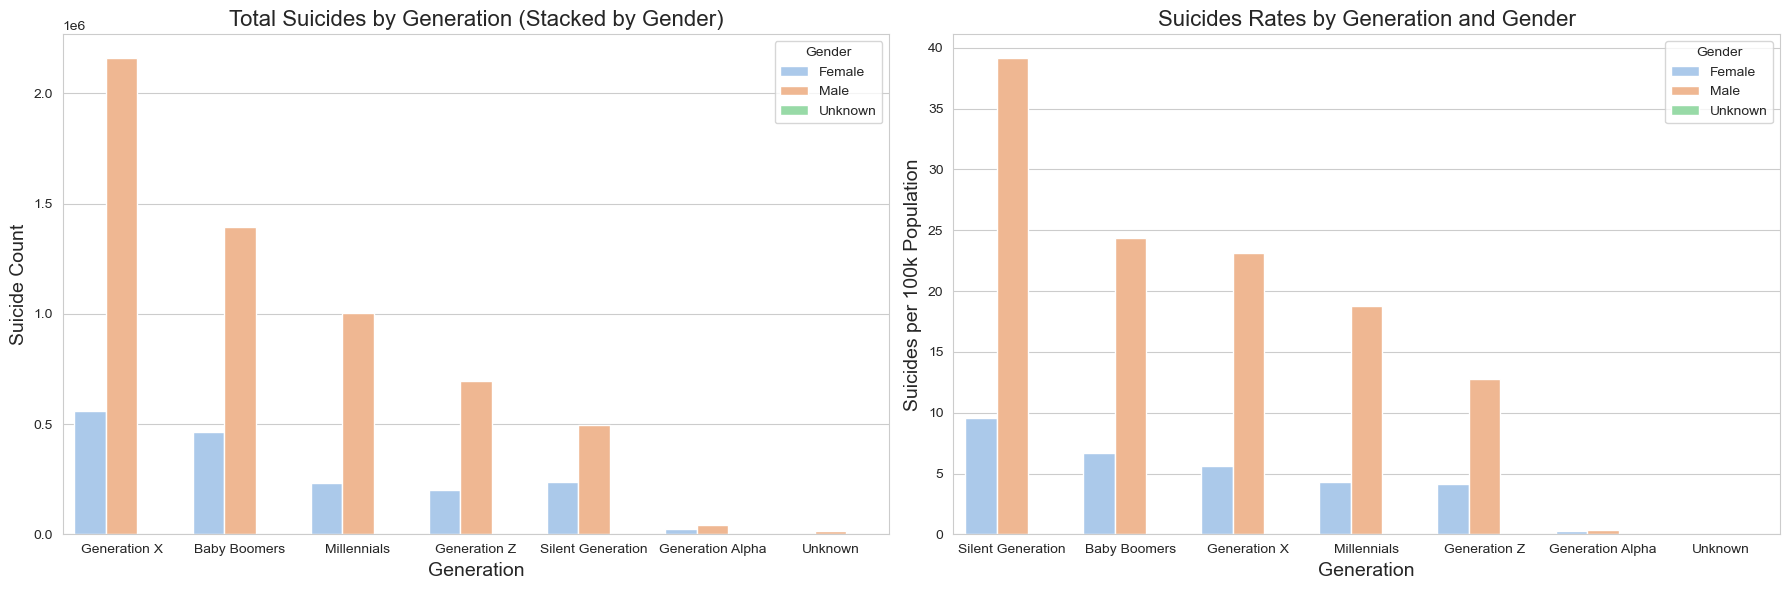

In [80]:
generation_totals_count = df.groupby(['Generation', 'Sex'])['SuicideCount'].sum().reset_index()
sorted_generation_order = df.groupby('Generation')['SuicideCount'].sum().sort_values(ascending=False).index

generation_totals_rate = df.groupby(['Generation', 'Sex'])['DeathRatePer100K'].mean().reset_index()
sorted_generation_pop_order = df.groupby('Generation')['DeathRatePer100K'].mean().sort_values(ascending=False).index

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Suicides by Generation and Gender
sns.set_palette("pastel")  # Changed color palette
stacked_bar_count = sns.barplot(
    x='Generation',
    y='SuicideCount',
    hue='Sex',
    order=sorted_generation_order,
    data=generation_totals_count,
    errorbar=None,
    ax=axes[0]
)

# Set titles and labels
axes[0].set_xlabel("Generation", fontsize=14)
axes[0].set_ylabel("Suicide Count", fontsize=14)
axes[0].set_title("Total Suicides by Generation (Stacked by Gender)", fontsize=16)
axes[0].legend(title="Gender", loc="upper right")

# Plot 2: Suicides per 100k Population by Generation and Gender (Bar Chart)
sns.set_palette("pastel")  # Changed color palette
barplot_rate = sns.barplot(
    x='Generation',
    y='DeathRatePer100K',
    hue='Sex',
    order=sorted_generation_pop_order,
    data=generation_totals_rate,
    errorbar=None,
    ax=axes[1]
)

# Set titles and labels
axes[1].set_xlabel("Generation", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides Rates by Generation and Gender", fontsize=16)
axes[1].legend(title="Gender", loc="upper right")

# Adjust layout
plt.tight_layout()

plt.show()



# Economic Impact and Correlation

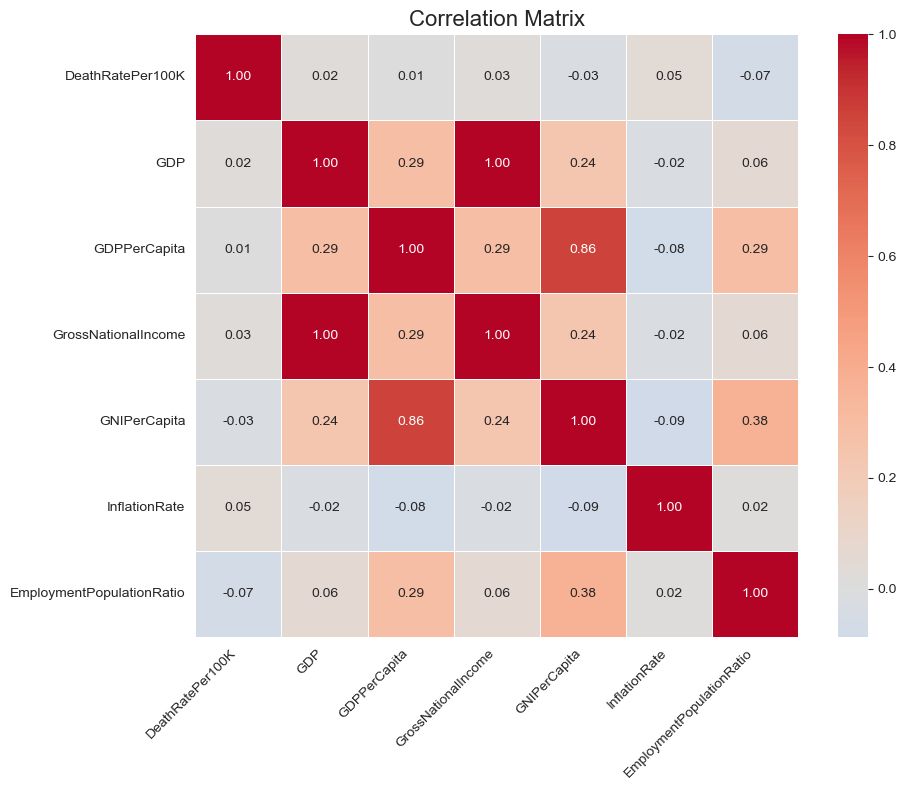

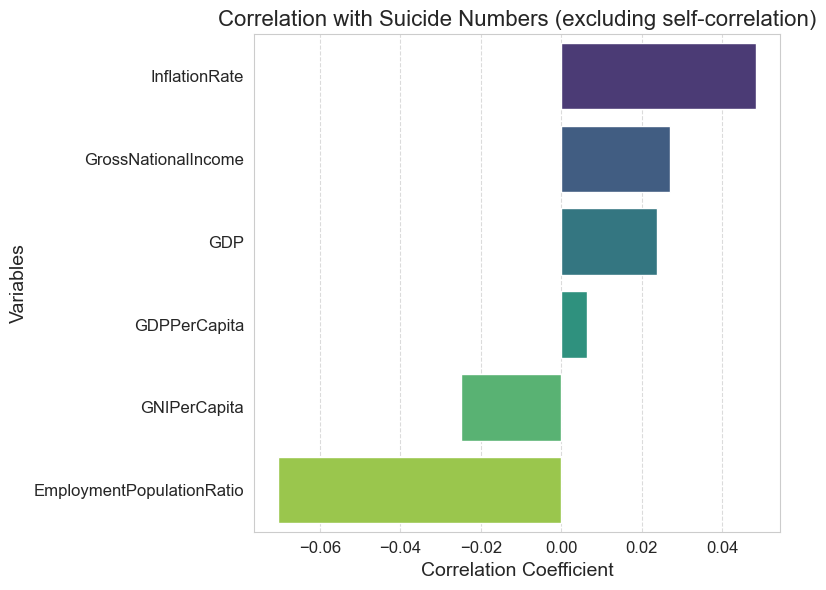

In [81]:
numeric_columns = ['DeathRatePer100K', 'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
                  'EmploymentPopulationRatio']

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5,
    fmt=".2f", 
    center=0, 
    square=True, 
)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Analyze correlation with suicides, excluding self-correlation
correlation_with_suicides = correlation_matrix['DeathRatePer100K'].sort_values(ascending=False)[1:]

# Barplot for correlation with suicide numbers
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(
    x=correlation_with_suicides.values, 
    y=correlation_with_suicides.index, 
    palette='viridis'  # Changed color palette
)
plt.title('Correlation with Suicide Numbers (excluding self-correlation)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


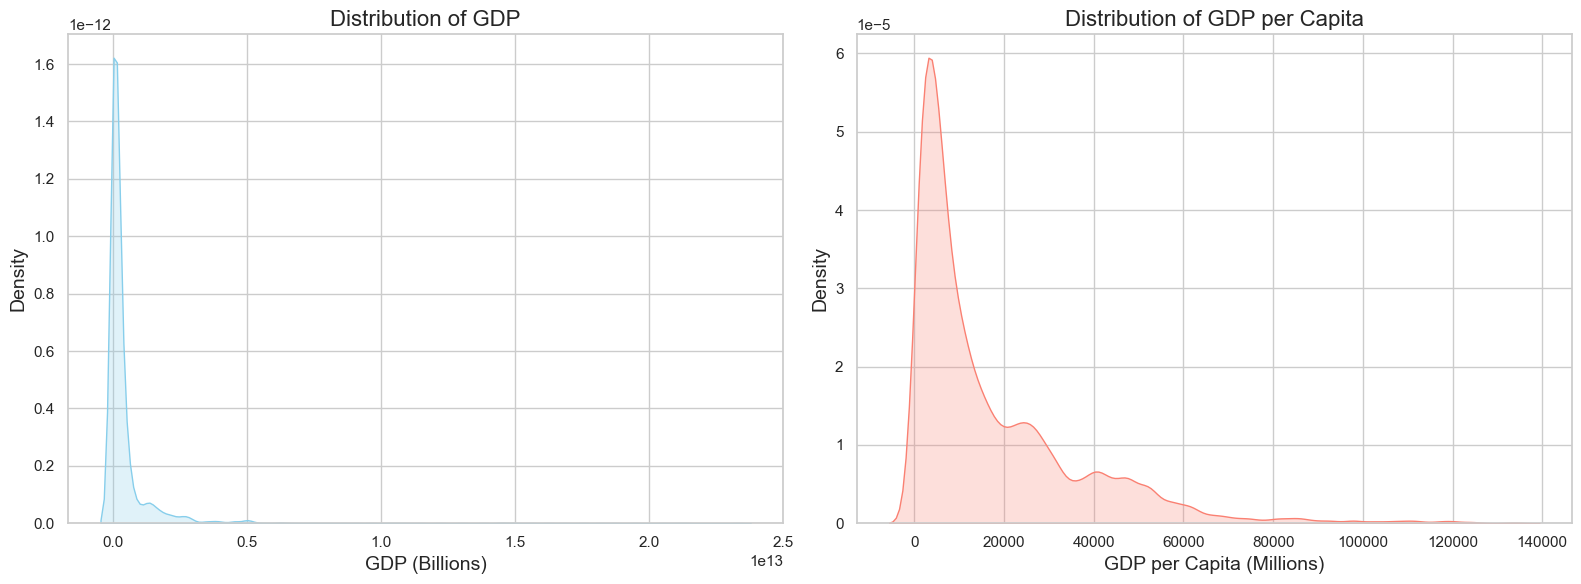

In [82]:
sns.set(style="whitegrid", palette="Set2")  # Change palette to Set2

# Set up figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# GDP Distribution Analysis - GDP for Year
sns.kdeplot(df['GDP'], shade=True, color='skyblue', label='GDP', ax=axes[0])

# Set titles and labels
axes[0].set_title('Distribution of GDP', fontsize=16)
axes[0].set_xlabel('GDP (Billions)', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)

# GDP Distribution Analysis - GDP per Capita
sns.kdeplot(df['GDPPerCapita'], shade=True, color='salmon', label='GDP per Capita', ax=axes[1])

# Set titles and labels
axes[1].set_title('Distribution of GDP per Capita', fontsize=16)
axes[1].set_xlabel('GDP per Capita (Millions)', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)

# Display plot
plt.tight_layout()
plt.show()
